# CNA PREP and RESULTS TISSUE CELLS
## Sid Gurajala
## 05/01/2023

## Libraries 

In [1]:
source("/data/srlab/ssg34/SLE_kidney_v2/scripts/libs/kidney_utils.r")
clinical <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/clinical_data_05042023.rds') %>% 
                        rename(Final_Site = Site) %>% select(-sample)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite

Loading required package: Rcpp

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘pals’


The following objects are masked from ‘package:viridis’:

    cividis, inferno, magma, plasma, turbo, viridis


The following objects are masked from ‘package:viridisLite’:

    cividis, inferno, magma, plasma, turbo, viridis



Attaching package: ‘singlecellmethods’


The following object is masked from ‘package:SeuratObject’:

    rowMeans


The following object is masked from ‘package:base’:

    rowMeans


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘p

In [ ]:
#all_meta <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/20230215_Tissue/meta_Tissue_500nGene_1000nUMI_3pctnontargetMTwdoubletandsampleFINAL-02-22-23.rds')
norm <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/normalized_data_ScNuc_500nGene_1000nUMI_3pctnontargetMTwdoubletandsampleFINAL-8-10-22.rds')

In [ ]:
rawcounts <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/2022-08-09_ScNuc_cell_QCed_RawCounts.rds')
mito_genes_subset <- c("MT-ND5", "MT-ND6")
percent_mito <- colSums(rawcounts[mito_genes_subset, ]) / colSums(rawcounts) * 100
percent_mito <- data.frame(cell = names(percent_mito), percent.mt = percent_mito)

In [ ]:
saveRDS(percent_mito, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/percent_mito_from_rawcounts_12072023.rds')

In [1]:
percent_mito <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/percent_mito_from_rawcounts_12072023.rds')

In [ ]:
kpmp_markers <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/KPMP_markers.csv')

# GLOM

## SUBTYPES

In [2]:
glom_meta <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/20230215_Tissue/GLOM/2023-06-30_meta_500nGene_1000nUMI_3.rds')

In [ ]:
cluster_center <- glom_meta %>%
                  group_by(hres.0.4) %>%
                  summarise_at(vars(huwotUMAP1, huwotUMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)

In [ ]:
options(repr.plot.height = 10, repr.plot.width = 10)

ggplot() +
  geom_point(
    data = glom_meta[sample(nrow(glom_meta)), ] %>% filter(dataset == "scRNAseq") %>% 
      select(huwotUMAP1, huwotUMAP2, hres.0.4) %>% 
              mutate(hres.0.4 = as.factor(hres.0.4)), 
    aes(x = huwotUMAP1, y = huwotUMAP2, color = hres.0.4),
    size = 0.75, shape = 20, stroke = 0.0001
  ) +
  ggrepel::geom_label_repel(
    data = cluster_center,
    aes(x = huwotUMAP1, y = huwotUMAP2, 
        label = hres.0.4, color = as.factor(hres.0.4)),
    size = 6,  fontface = "bold",
    box.padding = unit(0.5, "lines"),
    point.padding = unit(0.01, "lines")
  ) +
    ggsci::scale_color_frontiers() +
theme_classic(base_size = 15) +
#scale_x_continuous(limits = c(-10, 15)) +
#scale_y_continuous(limits = c(-12, 15)) +
  theme(
    legend.position = "none",
        #  plot.title = element_text(hjust = 0.5, 
        #                            size = 18, 
        #                            face = "bold"),
          axis.title = element_text(hjust = 0.75, 
                                    size = 20, 
                                    face = "bold"), 
    #     axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=1)
) +
    labs(x = "UMAP1", y = "UMAP2") +
    guides(color = guide_legend(ncol = 1, override.aes = list(size = 8)))

ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `final_annotation` is not found.


In [ ]:
fig.size(10, 12)
#PIP5K1B, ROBO1, PIEZO2, DAAM2, PHTF2, GATA3, POSTN
plot_shuffled_features(glom_meta %>% filter(dataset == "scRNAseq"), 
                       norm, 
                       "DAAM2", pct = 0.95) 
plot_shuffled_features(glom_meta %>% filter(dataset == "snRNAseq"), 
                       norm, 
                       "DAAM2", pct = 0.95) 

In [ ]:
write.csv(glom_de %>% rename(cluster = group), 
          '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_de_wilcox_sc_sn_07242023.csv',
          row.names = FALSE, quote = FALSE)

In [ ]:
glom_de <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_de_wilcox_sc_sn_07242023.csv')

In [ ]:
sc_de <- wilcoxauc(norm[, glom_meta %>% filter(dataset == "scRNAseq") %>% pull(cell)], glom_meta %>% filter(dataset == "scRNAseq") %>% pull(hres.0.4)) 
sn_de <- wilcoxauc(norm[, glom_meta %>% filter(dataset == "snRNAseq") %>% pull(cell)], glom_meta %>% filter(dataset == "snRNAseq") %>% pull(hres.0.4))

In [ ]:
genes <- c(
           extract_broad_genes("TL")) 

In [ ]:
extract_subtype_genes("PEC")

In [ ]:
sc_plot_df <- sc_de %>%  filter(feature %in% genes) %>% 
                    select(group, feature, 
                           logFC, avgExpr, pct_in) %>% ungroup() %>% group_by(feature) %>% 
                    mutate(avgExpr_scaled = scale(avgExpr)) 
sn_plot_df <- sn_de %>%  filter(feature %in% genes) %>% 
                    select(group, feature, 
                           logFC, avgExpr, pct_in) %>% ungroup() %>% group_by(feature) %>% 
                    mutate(avgExpr_scaled = scale(avgExpr)) 

In [ ]:
range(sc_plot_df$avgExpr_scaled)
range(sn_plot_df$avgExpr_scaled)

In [ ]:
fig.size(8, 12)
ggplot(sc_plot_df %>% rename(percent = pct_in,
                             zscore = avgExpr_scaled), 
               aes(x = feature, y = group, 
                   color = zscore, size = percent)) + 
    geom_point() + 
    theme_classic(base_size = 12) + 
    scale_color_gradientn(colors = viridis_pal()(10), limits=c(-1, 2.5), 
                           na.value = "#FDE725FF") + 
    scale_x_discrete(limits = genes) + 
    theme(axis.text.x = element_text(angle = 90),
          axis.text = element_text(face = "bold", size = 15),
          axis.title = element_text(size = 15)) + 
    labs(x = "", y = "")
ggplot(sn_plot_df %>% rename(percent = pct_in,
                             zscore = avgExpr_scaled), 
               aes(x = feature, y = group, 
                   color = zscore, size = percent)) + 
    geom_point() + 
    theme_classic(base_size = 12) + 
    scale_color_gradientn(colors = viridis_pal()(10), limits=c(-1, 2.5), 
                           na.value = "#FDE725FF") + 
    scale_x_discrete(limits = genes) + 
    theme(axis.text.x = element_text(angle = 90),
          axis.text = element_text(face = "bold", size = 15),
          axis.title = element_text(size = 15)) + 
    labs(x = "", y = "")

In [ ]:
fig.size(8, 12)
ggplot(sc_plot_df %>% rename(percent = pct_in,
                             zscore = avgExpr_scaled), 
               aes(x = feature, y = group, 
                   color = zscore, size = percent)) + 
    geom_point() + 
    theme_classic(base_size = 12) + 
    scale_color_gradientn(colors = viridis_pal()(10), limits=c(-1, 2.5), 
                           na.value = "#FDE725FF") + 
    scale_x_discrete(limits = genes) + 
    theme(axis.text.x = element_text(angle = 90),
          axis.text = element_text(face = "bold", size = 15),
          axis.title = element_text(size = 15)) + 
    labs(x = "", y = "")
ggplot(sn_plot_df %>% rename(percent = pct_in,
                             zscore = avgExpr_scaled), 
               aes(x = feature, y = group, 
                   color = zscore, size = percent)) + 
    geom_point() + 
    theme_classic(base_size = 12) + 
    scale_color_gradientn(colors = viridis_pal()(10), limits=c(-1, 2.5), 
                           na.value = "#FDE725FF") + 
    scale_x_discrete(limits = genes) + 
    theme(axis.text.x = element_text(angle = 90),
          axis.text = element_text(face = "bold", size = 15),
          axis.title = element_text(size = 15)) + 
    labs(x = "", y = "")

In [ ]:
ggplot(glom_meta, 
       aes(x = as.factor(hres.0.4), y = as.numeric(doublet_score), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) + 
    labs(x = "cluster", y = "scrublet_score") + 
    scale_y_continuous(limits = c(0, 0.4))




ggplot(glom_meta, 
       aes(x = as.factor(hres.0.4), y = log(as.numeric(nCount_RNA)), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) +
    labs(x = "cluster", y = "log(Counts Per Cell)")




ggplot(glom_meta,
       aes(x = as.factor(hres.0.4), y = log(as.numeric(nFeature_RNA)), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) + 
    labs(x = "cluster", y = "log(Genes Per Cell)")

In [ ]:
fig.size(8, 8)

plot_dist <- function(input_df, norm, feature)  {
    plot_df <- input_df %>% mutate(Exp = norm[feature, input_df$cell])
    p <- ggplot(plot_df, aes(x = hres.0.2, y = Exp, fill = dataset)) + 
            geom_boxplot() + 
            theme_classic(base_size = 20) + 
            labs(x = "Cluster", y = "Normalized Expression", title = feature) +
            theme(plot.title = element_text(size = 25, face = "bold.italic", hjust = 0.5))
    return(p)
}
#PIP5K1B, ROBO1, PIEZO2, DAAM2, PHTF2, GATA3, POSTN
plot_dist(glom_meta, norm, "SLC12A1")
plot_dist(glom_meta, norm, "TRPM6")
plot_dist(glom_meta, norm, "ADGRL3")

## RECLUSTER

In [ ]:
celltype <- 'GLOM'

path = '/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/'

nGenepar <- 500
nUMIpar <- 1000
pctmt <- 3

In [ ]:
glom_meta <- glom_meta %>% filter(!hres.0.4 %in% c(2, 4, 6, 7, 8))

In [ ]:
genes_exclude <- c(grep("^MT-|^RPL|^RPS|MALAT1|MIR-", row.names(glom_norm), value = TRUE), Seurat::cc.genes$s.genes, Seurat::cc.genes$g2m.genes) 

In [ ]:
sc_meta <- glom_meta %>% filter(dataset == "scRNAseq")
sn_meta <- glom_meta %>% filter(dataset == "snRNAseq")

In [ ]:
glom_norm <- norm[, glom_meta$cell]

In [ ]:
sc_norm <- glom_norm[, sc_meta$cell]
sn_norm <- glom_norm[, sn_meta$cell]

In [ ]:
sc_threshold_genes <- sc_norm[rownames(sc_norm[rowMeans(sc_norm) >= .01, ]), ]
sn_threshold_genes <- sn_norm[rownames(sn_norm[rowMeans(sn_norm) >= .01, ]), ]

In [ ]:
sc_threshold_genes <- sc_threshold_genes[ -which( rownames(sc_threshold_genes) %in% genes_exclude ) ,]
sn_threshold_genes <- sn_threshold_genes[ -which( rownames(sn_threshold_genes) %in% genes_exclude ) ,]

In [ ]:
sc_samples_25 <- sc_meta %>% group_by(sample) %>% tally() %>% filter(n > 25) %>% pull(sample)

sc_threshold_samples <- sc_threshold_genes[, sc_meta %>% filter(sample %in% sc_samples_25) %>% pull(cell)]


sn_samples_25 <- sn_meta %>% group_by(sample) %>% tally() %>% filter(n > 25) %>% pull(sample)

sn_threshold_samples <- sn_threshold_genes[, sn_meta %>% filter(sample %in% sn_samples_25) %>% pull(cell)]

In [ ]:
sc_var_genes_1000_raw <- vargenes_vst(object = sc_threshold_samples, groups = sc_meta %>% filter(sample %in% sc_samples_25) %>% pull(sample), topn = 500)

sn_var_genes_1000_raw <- vargenes_vst(object = sn_threshold_samples, groups = sn_meta %>% filter(sample %in% sn_samples_25) %>% pull(sample), topn = 500)

In [ ]:
saveRDS(sc_var_genes_1000_raw, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',
                                     "variable_genes_500_perSample_",
                                     "sc_",
                                     nGenepar,
                                    "nGene_",
                                     nUMIpar,
                                     "nUMI_",
                                     pctmt,
                                     ".rds",
                            sep = ""),
        version = 2
       )


saveRDS(sn_var_genes_1000_raw, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',
                                     "variable_genes_500_perSample_",
                                     "sn_",
                                     nGenepar,
                                    "nGene_",
                                     nUMIpar,
                                     "nUMI_",
                                     pctmt,
                                     ".rds",
                            sep = ""),
        version = 2
       )

In [ ]:
inter_var <- intersect(sc_var_genes_1000_raw, sn_var_genes_1000_raw) 

vargenes_df <- inter_var

length( vargenes_df )

In [ ]:
#rm(sc_norm, sn_norm, sc_meta, sn_meta)

In [ ]:
glom_scaled <- glom_norm[ vargenes_df,] %>% ScaleDataSeurat() 

In [ ]:
table(glom_meta$dataset)
y <- factor(glom_meta$dataset)
weights <- as.numeric((1 / prop.table(table(y)))[y]) / nlevels(y)

In [ ]:
temp <- Matrix::Matrix(glom_scaled, sparse = TRUE)


pca_res <- weighted_pca(temp, weights, rownames(temp), 20, TRUE, 10)#$embeddings

In [ ]:
saveRDS(pca_res, paste0(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',
                        '20weightedPCA_object.rds'
))

In [ ]:
pca_res <- pca_res$embeddings 

umap_object <- uwot::umap(
    X = pca_res[,1:20],
    ret_extra = c('nn', 'fgraph', 'model')
) 
glom_meta$uwotUMAP1 <- umap_object$embedding[, 1]
glom_meta$uwotUMAP2 <- umap_object$embedding[, 2]

In [ ]:
saveRDS(umap_object, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',

                            "umap_",
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
)

In [ ]:
glom_meta <- glom_meta %>% select( -c(grep("hres", colnames(glom_meta)), 
                         grep("hPC", colnames(glom_meta)),
                          huwotUMAP1, huwotUMAP2))

In [ ]:
saveRDS(glom_meta, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',
                            "meta_",
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
)

In [ ]:
library(harmony)

harmony <- HarmonyMatrix(pca_res[,1:20], glom_meta, vars_use = c("sample", "processing.batch", "Site", 'dataset'), theta = c(1,0,0,1),
                         # lambda = 1, 
#                          tau = 0, 
                          epsilon.cluster = -Inf,
                          epsilon.harmony = -Inf,
                         sigma = 0.15,
                         max.iter.cluster = 50,
                         max.iter.harmony = 20,
                         plot_convergence = TRUE,
                             npcs = 20,
                            do_pca = F,
                            weights = weights)

colnames(harmony) <-  c("hPC-1", "hPC-2", "hPC-3", "hPC-4",
                      "hPC-5", "hPC-6", "hPC-7", "hPC-8",
                      "hPC-9", "hPC-10", "hPC-11", "hPC-12",
                      "hPC-13", "hPC-14", "hPC-15", "hPC-16",
                      "hPC-17", "hPC-18", "hPC-19", "hPC-20")

In [ ]:
harmony <- readRDS(paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/2023-11-03_harmony_',
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
       )



humap_object <- uwot::umap(
    X = harmony[,1:20],
    ret_extra = c('nn', 'fgraph', 'model')
) 

In [ ]:
saveRDS(humap_object, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/2023-11-03_humap_',
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
       )

In [ ]:
glom_meta$huwotUMAP1 <- humap_object$embedding[, 1]
glom_meta$huwotUMAP2 <- humap_object$embedding[, 2]
glom_meta <- cbind(glom_meta, harmony[, 1:20])

In [ ]:
saveRDS(glom_meta, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',
                            "meta_",
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
)
                           
saveRDS(harmony, paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/',
                                     Sys.Date(),
                                     '_',
                            "harmony_",
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
       )

#rm(pca_res)
#rm(meta)
#rm(harmony)

In [ ]:
glom_meta <- readRDS(paste0(path, '20230215_Tissue/', 
                                     celltype,
                                     '/2023-11-03_meta_500nGene_1000nUMI_3.rds'))

In [ ]:
humap_object <- readRDS(paste(path, '20230215_Tissue/', 
                                     celltype,
                                     '/2023-11-03_humap_',
                            nGenepar,
                            "nGene_",
                            nUMIpar,
                            "nUMI_",
                            pctmt,
                            ".rds",
                            sep = "")
       )

In [ ]:
resolution_list <- c(0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0)
ids_ref_cca <- Reduce(cbind, mclapply(resolution_list, function(res_use) {
    Seurat:::RunModularityClustering(SNN = humap_object$fgraph, modularity = 1, 
        resolution = res_use, algorithm = 1, n.start = 20, 
        n.iter = 20, random.seed = 100, print.output = FALSE, 
        temp.file.location = NULL, edge.file.name = NULL)
}, mc.preschedule = FALSE, mc.cores = min(20, length(resolution_list))))
gc()
colnames(ids_ref_cca) <- sprintf("hres.%.2f", resolution_list)

In [ ]:
glom_meta <- glom_meta %>% select(-grep("hres|huwotUMAP", colnames(glom_meta))) %>% 
                    cbind(ids_ref_cca %>% data.frame() %>% mutate(across(where(is.numeric), as.factor)))

In [ ]:
glom_meta <- glom_meta %>% cbind(data.frame(huwotUMAP1 = humap_object$embedding[, 1],
                                            huwotUMAP2 = humap_object$embedding[, 2]))

In [ ]:
glom_meta <- glom_meta %>% filter(hres.0.20 != 4)
glom_meta$hres.0.20[glom_meta$hres.0.20 == 5] <- 4

In [ ]:
saveRDS(glom_meta, paste0(path, '20230215_Tissue/', 
                                     celltype,
                                     '/2023-11-22_meta_500nGene_1000nUMI_3.rds'))

## SUBTYPING PART 2

In [ ]:
celltype <- 'GLOM'
path = '/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/'
glom_meta <- readRDS(paste0(path, '20230215_Tissue/', 
                                     celltype,
                                     '/2023-11-22_meta_500nGene_1000nUMI_3.rds'))

In [ ]:
final_annotation = data.frame("hres.0.20" = factor(seq(0, 4)),
                              "final_annotation" = c("GLOM0. BCAMhigh AKAP12high PEC",
                                                     "GLOM1. SDK1high HDAC9high PEC",
                                                     "GLOM2. Podocyte", 
                                                     "GLOM3. CXCL14high MMP7high PEC",
                                                     "GLOM4. Proliferating"))

In [ ]:
glom_meta <- glom_meta %>% left_join(final_annotation)

In [ ]:
glom_meta <- glom_meta %>% left_join(percent_mito)

In [ ]:
saveRDS(glom_meta %>% select(-c(Annot.separate, predicted_broad, predicted_fine)),
        '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds')

In [ ]:
glom_norm <- norm[, glom_meta$cell]

In [ ]:
saveRDS(glom_norm, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_qcd_norm_12072023.rds')

In [ ]:
glom_norm <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_qcd_norm_12072023.rds')

In [2]:
glom_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds')

In [ ]:
qcd_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds')
qcd_meta <- qcd_meta %>% mutate(new_cluster_number = hres.0.20)

In [31]:
sn_control <- qcd_meta %>% filter(dataset == "snRNAseq", Type == "Control") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sn_control = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sn_control)
sn_LN <- qcd_meta %>% filter(dataset == "snRNAseq", Type == "LN") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sn_LN = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sn_LN)
sc_control <- qcd_meta %>% filter(dataset == "scRNAseq", Type == "Control") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sc_control = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sc_control)
sc_LN <- qcd_meta %>% filter(dataset == "scRNAseq", Type == "LN") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sc_LN = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sc_LN)
merged <- sc_LN %>% left_join(sc_control) %>% left_join(sn_LN) %>% left_join(sn_control)
merged[is.na(merged)] <- "0 (0)"
write.csv(merged, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_summary_04152024.csv', quote = FALSE, row.names = FALSE)

Joining, by = "new_cluster_number"
Joining, by = "new_cluster_number"
Joining, by = "new_cluster_number"


### CELL STATES 

In [13]:
qcd_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds')
qcd_meta <- qcd_meta %>% mutate(new_cluster_number = hres.0.20)

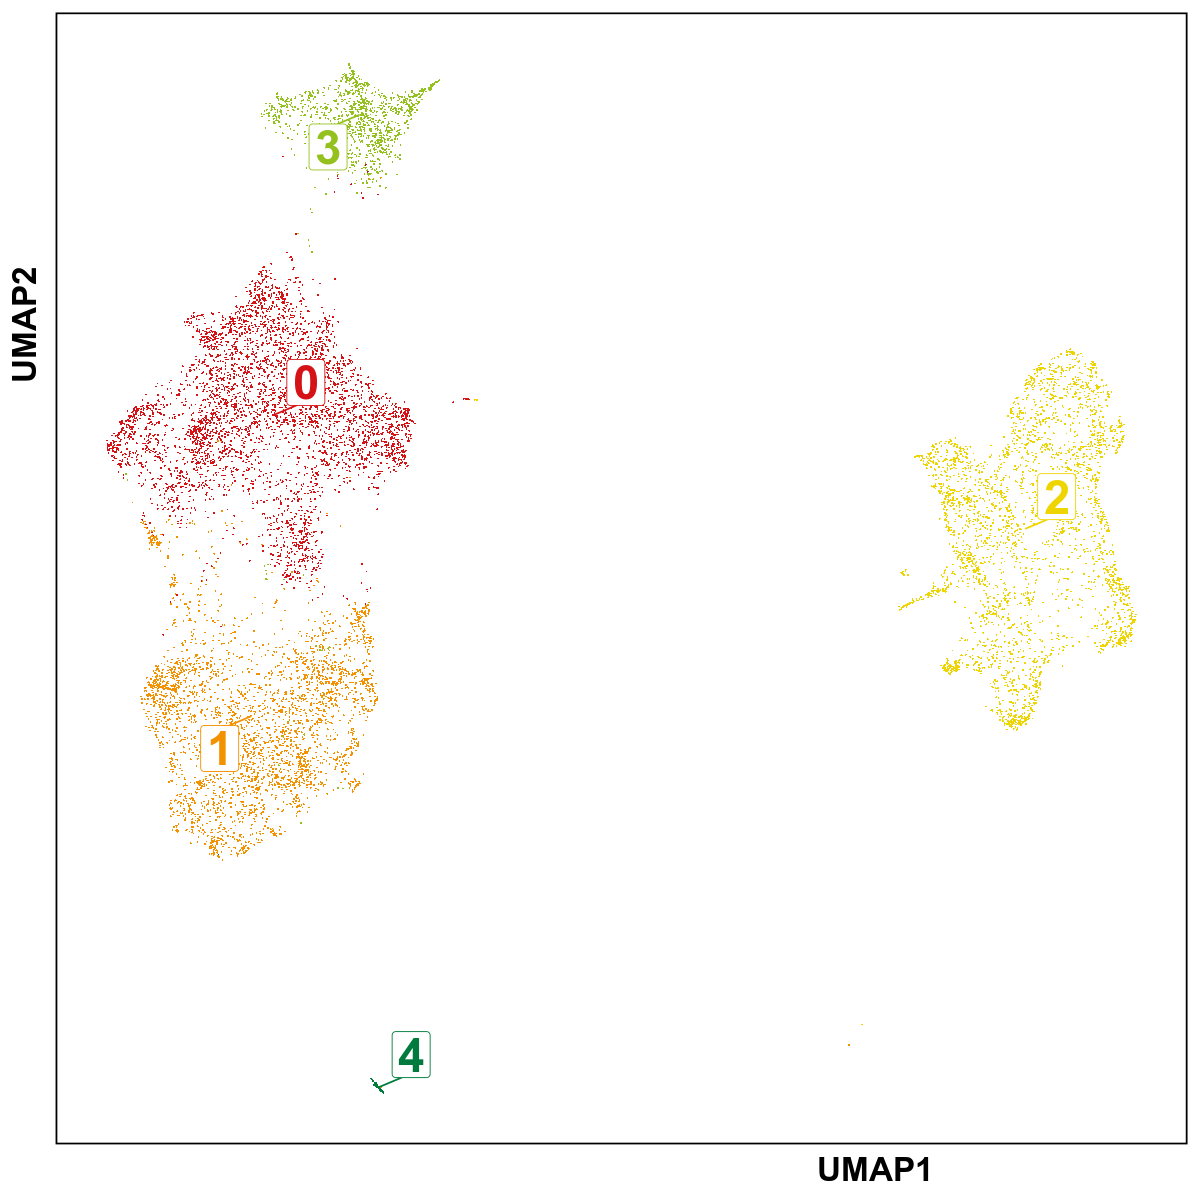

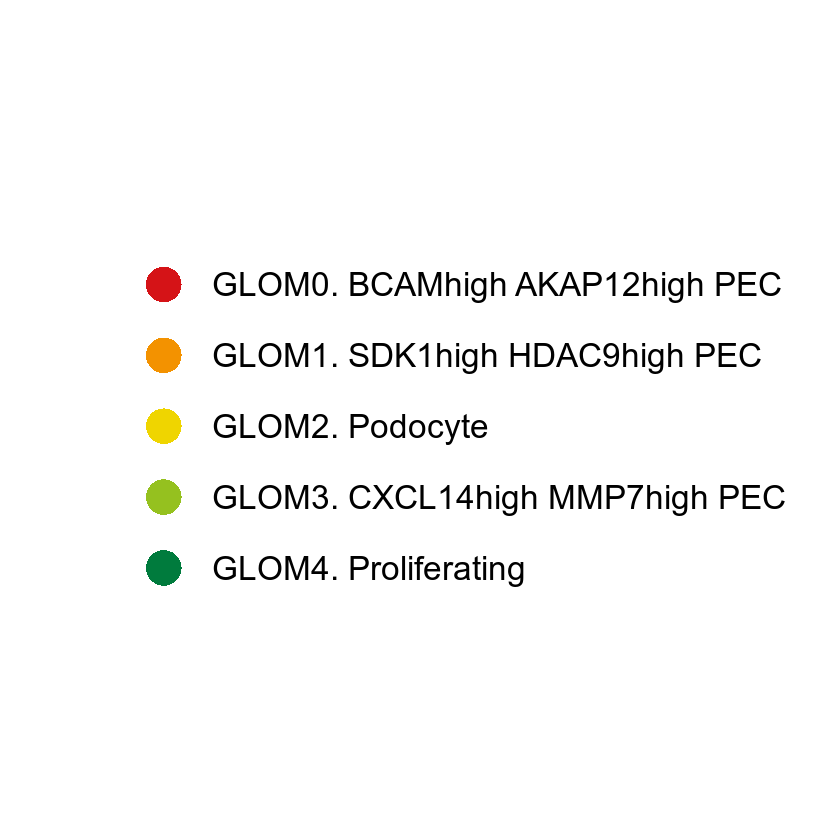

In [19]:
options(warn=-1)
cluster_center <- qcd_meta %>%
                  group_by(new_cluster_number, final_annotation) %>%
                  summarise_at(vars(huwotUMAP1, huwotUMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)

options(repr.plot.height = 9, repr.plot.width = 18)
p <- ggplot() +
      geom_point(
        data = qcd_meta[sample(nrow(glom_meta)), ] %>% 
          select(huwotUMAP1, huwotUMAP2, new_cluster_number, final_annotation) %>% 
                  mutate(final_annotation = factor(final_annotation, 
                                                   levels = cluster_center$final_annotation)),
        aes(x = huwotUMAP1, y = huwotUMAP2, color = final_annotation),
          size = 0.75, shape = 20, stroke = 0.0001) +
      ggrepel::geom_label_repel(
        data = cluster_center,
        aes(x = huwotUMAP1, y = huwotUMAP2, 
            label = new_cluster_number, color = as.factor(final_annotation)),
        size = 10,  fontface = "bold",
        box.padding = unit(0.5, "lines"),
        point.padding = unit(0.01, "lines"),
        show.legend = FALSE
      ) +
    ggsci::scale_color_frontiers() +
    theme_classic(base_size = 15) +
      theme(
        legend.position = "right",
            #  plot.title = element_text(hjust = 0.5, 
            #                            size = 18, 
            #                            face = "bold"),
              axis.title = element_text(hjust = 0.75, 
                                        size = 20, 
                                        face = "bold"), 
              axis.text = element_blank(),
              axis.line = element_blank(),
              axis.ticks = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=1),
              legend.text = element_text(size = 20),
              legend.title = element_blank()
          
    ) +
    theme(text=element_text(family="Arial")) + 
        labs(x = "UMAP1", y = "UMAP2") +
        guides(color = guide_legend(ncol = 1, override.aes = list(size = 15)))
legend <- cowplot::get_legend(p)
p <- p + theme(legend.position = "none")
legend <- cowplot::plot_grid(legend)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/figure2/figure2h.png",
       p,
       base_height = 10,
       base_width = 10)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/figure2/figure2h-legend.png",
       legend,
       base_height = 7,
       base_width = 7)
fig.size(10, 10)
p
fig.size(7, 7)
legend
options(warn=0)

In [ ]:
options(repr.plot.height = 8, repr.plot.width = 8)
ggplot() +
  geom_point(
    data=select(glom_meta, c(huwotUMAP1, huwotUMAP2, dataset)),
    aes(x = huwotUMAP1, y = huwotUMAP2),
    size = 0.75, stroke = 0.0001, color = "lightgrey"
  ) + 
  geom_point(
    data=glom_meta %>% filter(dataset == "scRNAseq") %>% select(huwotUMAP1, huwotUMAP2),
    aes(x = huwotUMAP1, y = huwotUMAP2),
    size = 0.75, stroke = 0.0001, color = "coral"
  ) +
theme_classic(base_size = 15) +
  theme(
    legend.position = "none",
        #  plot.title = element_text(hjust = 0.5, 
        #                            size = 18, 
        #                            face = "bold"),
          axis.title = element_text(hjust = 0.6, 
                                    size = 20, 
                                    face = "bold"), 
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=1)
) +     labs(x = "UMAP1", y = "UMAP2") 


ggplot() +
  geom_point(
    data=select(glom_meta, c(huwotUMAP1, huwotUMAP2, dataset)),
    aes(x = huwotUMAP1, y = huwotUMAP2),
    size = 0.75, stroke = 0.0001, shape = 20, color = "lightgrey"
  ) + 
  geom_point(
    data=glom_meta %>% filter(dataset == "snRNAseq") %>% select(huwotUMAP1, huwotUMAP2),
    aes(x = huwotUMAP1, y = huwotUMAP2),
    size = 0.75, stroke = 0.0001, shape = 20, color = "deepskyblue"
  ) +
theme_classic(base_size = 15) +
  theme(
    legend.position = "none",
        #  plot.title = element_text(hjust = 0.5, 
        #                            size = 18, 
        #                            face = "bold"),
          axis.title = element_text(hjust = 0.75, 
                                    size = 20, 
                                    face = "bold"), 
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=1)
) +     labs(x = "UMAP1", y = "UMAP2") 

In [ ]:
fig.size(10, 12)
plot_shuffled_features(glom_meta, 
                       glom_norm, 
                       "PODXL", pct = 0.95,
                       pt_size = 0.75) 

### SC VS SN HEATMAP

In [ ]:
glom_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds')
glom_norm <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_qcd_norm_12072023.rds')

In [ ]:
sc_de <- wilcoxauc(glom_norm[, glom_meta %>% filter(dataset == "scRNAseq") %>% pull(cell)], glom_meta %>% filter(dataset == "scRNAseq") %>% pull(hres.0.20)) 
sn_de <- wilcoxauc(glom_norm[, glom_meta %>% filter(dataset == "snRNAseq") %>% pull(cell)], glom_meta %>% filter(dataset == "snRNAseq") %>% pull(hres.0.20))

In [ ]:
sc_de <- wilcoxauc(glom_norm[, glom_meta %>% filter(dataset == "scRNAseq") %>% pull(cell)], glom_meta %>% filter(dataset == "scRNAseq") %>% pull(final_annotation)) 
sn_de <- wilcoxauc(glom_norm[, glom_meta %>% filter(dataset == "snRNAseq") %>% pull(cell)], glom_meta %>% filter(dataset == "snRNAseq") %>% pull(final_annotation))

In [ ]:
genes <- c("VCAM1", "CFH", "ALDH1A2",
           "BCAM", "AKAP12",
           "SDK1", "HDAC9",
           "PODXL", "NPHS2", "WT1",
           "CXCL14", "MMP7",
           "CENPF", "PCNA", "DIAPH3")

In [ ]:
sc_plot_df <- sc_de %>%  filter(feature %in% genes) %>% 
                    select(group, feature, 
                           logFC, avgExpr, pct_in) %>% ungroup() %>% group_by(feature) %>% 
                    mutate(avgExpr_scaled = scale(avgExpr)) 
sn_plot_df <- sn_de %>%  filter(feature %in% genes) %>% 
                    select(group, feature, 
                           logFC, avgExpr, pct_in) %>% ungroup() %>% group_by(feature) %>% 
                    mutate(avgExpr_scaled = scale(avgExpr)) 

In [ ]:
fig.size(10, 15)
ggplot(sc_plot_df %>% rename(percent = pct_in,
                             zscore = avgExpr_scaled), 
               aes(x = feature, y = group, 
                   fill = zscore)) + 
    geom_tile() + 
    theme_classic(base_size = 12) + 
    scale_fill_gradient2(low = "blue",
                         mid = "white",
                         high= "red", 
                         limits=c(-2, 2), 
                         oob = scales::squish) + 
    scale_x_discrete(limits = genes) + 
    scale_y_discrete(limits = final_annotation$final_annotation) + 
    theme(axis.text.x = element_text(angle = 90),
          axis.text = element_text(face = "bold", size = 15),
          axis.title = element_text(size = 15)) + 
    labs(x = "", y = "")
fig.size(10, 15)
ggplot(sn_plot_df %>% rename(percent = pct_in,
                             zscore = avgExpr_scaled), 
               aes(x = feature, y = group, 
                   fill = zscore)) + 
    geom_tile() + 
    theme_classic(base_size = 12) + 
    scale_fill_gradient2(low = "blue",
                         mid = "white",
                         high= "red", 
                         limits=c(-2, 2), 
                         oob = scales::squish) + 
    scale_x_discrete(limits = genes) + 
    scale_y_discrete(limits = final_annotation$final_annotation) + 
    theme(axis.text.x = element_text(angle = 90),
          axis.text = element_text(face = "bold", size = 15),
          axis.title = element_text(size = 15)) + 
    labs(x = "", y = "")

### SC VS SN FREQUENCY

In [ ]:
colnames(glom_meta)

In [ ]:
glom_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds')
glom_meta <- glom_meta  %>% 
                mutate(hres.0.20 = factor(hres.0.20, levels = as.character(0:4))) %>% 
                mutate(individual = str_split(sample, '_')) %>% 
                rowwise() %>% 
                mutate(individual = unlist(individual)[3]) 

sample_freq <- glom_meta %>% select(dataset, individual, hres.0.20) %>% 
                    table() %>% data.frame() %>% 
                    pivot_wider(names_from = "hres.0.20", values_from = Freq) 

ind_list <- glom_meta %>% select(dataset, individual) %>% 
                table() %>% data.frame() %>% 
                pivot_wider(names_from = 'dataset', values_from = "Freq") %>% filter(scRNAseq > 50 & snRNAseq > 50) %>% 
                pull(individual)

sample_freq_sc <- sample_freq %>% 
                    filter(individual %in% ind_list) %>% 
                    select(- individual) %>% 
                    filter(dataset == "scRNAseq") %>% 
                    select(-dataset) %>% colSums()

sample_freq_sn <- sample_freq %>% 
                    filter(individual %in% ind_list) %>% 
                    select(- individual) %>% 
                    filter(dataset == "snRNAseq") %>% 
                    select(-dataset) %>% colSums()
sample_freq <- data.frame(rep("a", 5))
sample_freq$sc_freq <- sample_freq_sc / sum(sample_freq_sc)
sample_freq$sc_se <- sqrt((sample_freq$sc_freq * (1 - sample_freq$sc_freq)) / sample_freq_sc)
sample_freq$sn_freq <- sample_freq_sn / sum(sample_freq_sn)
sample_freq$sn_se <- sqrt((sample_freq$sn_freq * (1 - sample_freq$sn_freq)) / sample_freq_sn)
sample_freq <- sample_freq[,- 1]
sample_freq$hres.0.20 <- as.character(seq(0, 4))

fig.size(8, 8)

max_val <- max(sample_freq[, c("sc_freq", "sn_freq")])

ggplot(sample_freq, aes(x = sc_freq, y = sn_freq, color = hres.0.20)) + 
    geom_abline(linetype = "dashed") +
    ggsci::scale_color_frontiers() +
    theme_classic() + 
    geom_point(size = 4) + 
    geom_linerange(aes(ymax = sn_freq+1.96*sn_se, 
                        ymin = sn_freq-1.96*sn_se), alpha = 0.5) +
    geom_linerange(aes(xmax = sc_freq+1.96*sc_se, 
                        xmin = sc_freq-1.96*sc_se), alpha = 0.5) +
    theme(legend.position = "none",
          axis.text = element_text(size = 15),
          axis.title = element_text(size = 18)) +
    coord_cartesian(xlim = c(0, 0.4), ylim = c(0, 0.4)) + 
    labs(x = "scRNAseq",
         y = "snRNAseq")

In [ ]:
cor.test(sample_freq$sc_freq, sample_freq$sn_freq)

In [ ]:
ggplot(glom_meta, 
       aes(x = as.factor(hres.0.20), y = as.numeric(doublet_score), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) + 
    labs(x = "cluster", y = "scrublet_score") + 
    scale_y_continuous(limits = c(0, 0.4))




ggplot(glom_meta, 
       aes(x = as.factor(hres.0.20), y = log(as.numeric(nCount_RNA)), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) +
    labs(x = "cluster", y = "log(Counts Per Cell)")




ggplot(glom_meta,
       aes(x = as.factor(hres.0.20), y = log(as.numeric(nFeature_RNA)), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) + 
    labs(x = "cluster", y = "log(Genes Per Cell)")

### GENE LIST FOR DE

In [2]:
glom_norm <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_qcd_norm_12072023.rds')

In [3]:
gene_list <-  mclapply(rownames(glom_norm), check_5p_exp, glom_norm, mc.cores = 20)

In [7]:
genes <- data.frame(genes = do.call(rbind, gene_list))

In [9]:
saveRDS(genes, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_5pgenes_de.rds')

## CASE/CONTROL

In [ ]:
first_biop_pred <- readRDS("/data/srlab2/qxiao/AMP-SLE/data/clinical/df_pred_biop.rds") %>% 
                        mutate(individual = str_split(Subject_ID, '-')) %>% 
                        rowwise() %>% 
                        mutate(individual = unlist(individual)[2])


sc_meta <- glom_meta[, !colnames(glom_meta) %in% colnames(clinical)] %>% 
                        mutate(kid_sample = glom_meta$sample) %>% 
                        filter(dataset == 'scRNAseq') %>% 
                        mutate(individual = str_split(kid_sample, '_')) %>% 
                        rowwise() %>% 
                        mutate(individual = unlist(individual)[3]) %>% 
                        left_join(clinical) %>% 
                        left_join(first_biop_pred) %>% 
                        select(c(cell, paste0('hPC-', 1:20), Sex, huwotUMAP1, huwotUMAP2, sample, final_annotation,
                                 Responder.Status, Age, Race, Final_ISN, Final_Chronicity, Final_Activity, Type, Final_Site,
                                 First_biop, Pred_use)) 

sn_meta <- glom_meta[, !colnames(glom_meta) %in% colnames(clinical)] %>% 
                        mutate(kid_sample = glom_meta$sample) %>% 
                        filter(dataset == 'snRNAseq') %>% 
                        mutate(individual = str_split(kid_sample, '_')) %>% 
                        rowwise() %>% 
                        mutate(individual = unlist(individual)[3]) %>% 
                        left_join(clinical) %>% 
                        left_join(first_biop_pred) %>% 
                        select(c(cell, paste0('hPC-', 1:20), Sex, huwotUMAP1, huwotUMAP2, sample, final_annotation,
                                 Responder.Status, Age, Race, Final_ISN, Final_Chronicity, Final_Activity, Type, Final_Site,
                                 First_biop, Pred_use)) 

In [ ]:
meta <- sn_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('UMAP', colnames(sn_meta))])))
harmony <- sn_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sn_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Type)]

meta <- meta[ind, ]
umap <- umap[ind, ]
harmony <- harmony[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))
meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Case.Control = c(0, 1),
                                      Type = c("Control", "LN")))

meta <- meta %>% left_join(data.frame(Responder_Status = c(0, 1, 2),
                                      Responder.Status = c("NR", "PR", "CR")))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")



write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sn_meta.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sn_harmony.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sn_umap.csv', 
          row.names = FALSE, quote = FALSE)

In [ ]:
meta <- sc_meta %>% select(-c(colnames(sc_meta[grep('hPC-', colnames(sc_meta))]), 
                          colnames(sc_meta[grep('UMAP', colnames(sc_meta))])))
harmony <- sc_meta %>% select(colnames(sc_meta)[grep('hPC-', colnames(sc_meta))])

umap <- sc_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Type)]

meta <- meta[ind, ]
umap <- umap[ind, ]
harmony <- harmony[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))
meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Case.Control = c(0, 1),
                                      Type = c("Control", "LN")))

meta <- meta %>% left_join(data.frame(Responder_Status = c(0, 1, 2),
                                      Responder.Status = c("NR", "PR", "CR")))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")



write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sc_meta.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sc_harmony.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sc_umap.csv', 
          row.names = FALSE, quote = FALSE)

### RESULTS

In [ ]:
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sc_meta.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sc_umap.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sc_ncorr.csv", header = FALSE)
fdrs <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sc_fdrs.csv", header = FALSE)
colnames(fdrs) <- c('threshold', 'fdr', 'ncells')
meta$ncorr <- ncorr$V1

fdr <- fdrs %>% filter(fdr < 0.05) %>% 
            mutate(fdr = round(fdr, 4)) %>% 
            filter(fdr == max(fdr)) %>% 
            pull(threshold)

tmp_meta <- meta %>% mutate(ifelse(abs(meta$ncorr) > fdr, ncorr, NA))
tmp_meta <- cbind(tmp_meta, umap)

fig.size(8, 8)
ggplot() + 
      geom_point(data = glom_meta,
                aes(x = huwotUMAP1, y = huwotUMAP2), color = 'lightgrey', size = 0.75, stroke = 0.0001, shape = 20) + 
      geom_point(
      data = tmp_meta[sample(nrow(tmp_meta)),] %>% rename(correlation = ncorr), 
          aes(x = huwotUMAP1, y = huwotUMAP2, color = correlation), size = 0.75, stroke = 0.0001, shape = 20) + 
      scale_color_gradient2(low = 'blue', mid = 'lightgray', high = 'red', na.value = "lightgrey") + 
     # labs(x="UMAP1", y="UMAP2", title = "Myeloid Chronicity: p = 2.00e-04") +
theme_classic(base_size = 15) +
  theme(
   # legend.position = "bottom",
   # legend.key.width = unit(1, 'cm'),
    legend.position  = "none",
          plot.title = element_text(hjust = 0.5, 
                                    size = 18, 
                                    face = "bold"),
          axis.title = element_text(hjust = 0.75, 
                                    size = 20, 
                                    face = "bold"), 
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          legend.title = element_text(face = "italic"),
          panel.border = element_rect(colour = "black", fill=NA, size=1)
) +
    labs(x="", y="", title = "", color = "r")


pos_fdr_thresh <- fdr
neg_fdr_thresh <- -1 * fdr


interval <- c(-max(abs(meta$ncorr)), max(abs(meta$ncorr)))


myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
fig.size(6, 12)

cluster_order <- meta %>% 
                    select(ncorr, final_annotation) %>% 
                    group_by(final_annotation) %>% 
                    summarize(avg = mean(ncorr)) %>% 
                    arrange(desc(avg)) %>% pull(final_annotation)


ggplot(meta, aes(y = reorder(final_annotation, ncorr), x = ncorr)) +
    ggbeeswarm::geom_quasirandom(aes(color = ncorr), width = 0.25, size = 0.5) +
    geom_vline(xintercept = neg_fdr_thresh, linetype = "dashed", color = "darkgrey") +
    geom_vline(xintercept = pos_fdr_thresh, linetype = "dashed", color = "darkgrey") +
    geom_vline(xintercept = 0, linetype = "dashed", color = "darkgrey") +
    scale_colour_gradientn(colours = myPalette(20), limits = interval) +
    scale_y_discrete(limits = cluster_order) +
    labs(x= "Neighborhood Correlation", y = "", title = "") +
    theme_classic() +
    theme(
        legend.position = "none",
        panel.grid = element_blank(),
        axis.text.x = element_text(color = "black", size = 15, hjust=0.5),
        axis.text.y = element_text(color = "black", size = 18, hjust=0.5),
        axis.title = element_text(size=18, hjust = 0.5))

In [ ]:
subset <- c("GLOM1. SDK1high HDAC9high PEC")

ggplot(meta, aes(y = reorder(final_annotation, ncorr), x = ncorr)) +
    ggbeeswarm::geom_quasirandom(aes(color = ncorr), width = 0.25, size = 0.5) +
    geom_vline(xintercept = neg_fdr_thresh, linetype = "dashed", color = "darkgrey") +
    geom_vline(xintercept = pos_fdr_thresh, linetype = "dashed", color = "darkgrey") +
    geom_vline(xintercept = 0, linetype = "dashed", color = "darkgrey") +
    scale_colour_gradientn(colours = myPalette(20), limits = interval) +
    scale_y_discrete(limits = subset) +
    labs(x= "Neighborhood Correlation", y = "", title = "") +
    theme_classic() +
    theme(
        legend.position = "none",
        panel.grid = element_blank(),
        axis.text.x = element_text(color = "black", size = 15, hjust=0.5),
        axis.text.y = element_text(color = "black", size = 25, hjust=0.5),
        axis.title = element_text(size=18, hjust = 0.5))

In [ ]:
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sn_meta.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sn_umap.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sn_ncorr.csv", header = FALSE)
fdrs <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sn_fdrs.csv", header = FALSE)
colnames(fdrs) <- c('threshold', 'fdr', 'ncells')
meta$ncorr <- ncorr$V1

fdr <- fdrs %>% filter(fdr < 0.05) %>% 
            mutate(fdr = round(fdr, 4)) %>% 
            filter(fdr == max(fdr)) %>% 
            pull(threshold)

tmp_meta <- meta %>% mutate(ifelse(abs(meta$ncorr) > fdr, ncorr, NA))
tmp_meta <- cbind(tmp_meta, umap)

fig.size(8, 8)
ggplot() + 
      geom_point(data = glom_meta,
                aes(x = huwotUMAP1, y = huwotUMAP2), color = 'lightgrey', size = 0.75, stroke = 0.0001, shape = 20) + 
      geom_point(
      data = tmp_meta[sample(nrow(tmp_meta)),] %>% rename(correlation = ncorr), 
          aes(x = huwotUMAP1, y = huwotUMAP2, color = correlation), size = 0.75, stroke = 0.0001, shape = 20) + 
      scale_color_gradient2(low = 'blue', mid = 'lightgray', high = 'red', na.value = "lightgrey") + 
     # labs(x="UMAP1", y="UMAP2", title = "Myeloid Chronicity: p = 2.00e-04") +
theme_classic(base_size = 15) +
  theme(
   # legend.position = "bottom",
   # legend.key.width = unit(1, 'cm'),
    legend.position  = "none",
          plot.title = element_text(hjust = 0.5, 
                                    size = 18, 
                                    face = "bold"),
          axis.title = element_text(hjust = 0.75, 
                                    size = 20, 
                                    face = "bold"), 
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          legend.title = element_text(face = "italic"),
          panel.border = element_rect(colour = "black", fill=NA, size=1)
) +
    labs(x="", y="", title = "", color = "r")


pos_fdr_thresh <- fdr
neg_fdr_thresh <- -1 * fdr


interval <- c(-max(abs(meta$ncorr)), max(abs(meta$ncorr)))


myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
fig.size(6, 12)

cluster_order <- meta %>% 
                    select(ncorr, final_annotation) %>% 
                    group_by(final_annotation) %>% 
                    summarize(avg = mean(ncorr)) %>% 
                    arrange(desc(avg)) %>% pull(final_annotation)


ggplot(meta, aes(y = reorder(final_annotation, ncorr), x = ncorr)) +
    ggbeeswarm::geom_quasirandom(aes(color = ncorr), width = 0.25, size = 0.5) +
    geom_vline(xintercept = neg_fdr_thresh, linetype = "dashed", color = "darkgrey") +
    geom_vline(xintercept = pos_fdr_thresh, linetype = "dashed", color = "darkgrey") +
    geom_vline(xintercept = 0, linetype = "dashed", color = "darkgrey") +
    scale_colour_gradientn(colours = myPalette(20), limits = interval) +
    scale_y_discrete(limits = cluster_order) +
    labs(x= "Neighborhood Correlation", y = "", title = "") +
    theme_classic() +
    theme(
        legend.position = "none",
        panel.grid = element_blank(),
        axis.text.x = element_text(color = "black", size = 15, hjust=0.5),
        axis.text.y = element_text(color = "black", size = 18, hjust=0.5),
        axis.title = element_text(size=18, hjust = 0.5))

In [ ]:
subset <- c("GLOM1. SDK1high HDAC9high PEC")

ggplot(meta, aes(y = reorder(final_annotation, ncorr), x = ncorr)) +
    ggbeeswarm::geom_quasirandom(aes(color = ncorr), width = 0.25, size = 0.5) +
    geom_vline(xintercept = neg_fdr_thresh, linetype = "dashed", color = "darkgrey") +
    geom_vline(xintercept = pos_fdr_thresh, linetype = "dashed", color = "darkgrey") +
    geom_vline(xintercept = 0, linetype = "dashed", color = "darkgrey") +
    scale_colour_gradientn(colours = myPalette(20), limits = interval) +
    scale_y_discrete(limits = subset) +
    labs(x= "Neighborhood Correlation", y = "", title = "") +
    theme_classic() +
    theme(
        legend.position = "none",
        panel.grid = element_blank(),
        axis.text.x = element_text(color = "black", size = 15, hjust=0.5),
        axis.text.y = element_text(color = "black", size = 25, hjust=0.5),
        axis.title = element_text(size=18, hjust = 0.5))

In [51]:
sc_meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sc_meta.csv')
sc_ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sc_ncorr.csv", header = FALSE)
sc_meta$ncorr <- sc_ncorr$V1
sn_meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sn_meta.csv')
sn_ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/case_control/sn_ncorr.csv", header = FALSE)
sn_meta$ncorr <- sn_ncorr$V1

final_annotation = data.frame("hres.0.20" = factor(seq(0, 4)),
                              "final_annotation" = c("GLOM0. BCAMhigh AKAP12high PEC",
                                                     "GLOM1. SDK1high HDAC9high PEC",
                                                     "GLOM2. Podocyte", 
                                                     "GLOM3. CXCL14high MMP7high PEC",
                                                     "GLOM4. Proliferating"))

sc_meta <- left_join(sc_meta, final_annotation) %>% mutate(new_cluster_number = hres.0.20)
sn_meta <- left_join(sn_meta, final_annotation) %>% mutate(new_cluster_number = hres.0.20)

sc_summary <- sc_meta %>% 
                select(new_cluster_number, cell, ncorr) %>% 
                group_by(new_cluster_number) %>% 
                summarize(sc.ncorr.ci = paste0("(", round(mean(ncorr) - 1.96 * sd(ncorr) / sqrt(length(cell)), 3),
                                      ", ", round(mean(ncorr) + 1.96 * sd(ncorr) / sqrt(length(cell)), 3), ")"))
sn_summary <-  sn_meta %>% 
                select(new_cluster_number, cell, ncorr) %>% 
                group_by(new_cluster_number) %>% 
                summarize(sn.ncorr.ci = paste0("(", round(mean(ncorr) - 1.96 * sd(ncorr) / sqrt(length(cell)), 3),
                                      ", ", round(mean(ncorr) + 1.96 * sd(ncorr) / sqrt(length(cell)), 3), ")"))
summary <- sc_summary %>% left_join(sn_summary)
write.table(summary, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_casecontrol_corr_04152024.csv', 
              quote = FALSE, row.names = FALSE, sep = "\t")

Joining, by = "final_annotation"
Joining, by = "final_annotation"
Joining, by = "new_cluster_number"


### DE

In [ ]:
glom_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds')
glom_norm <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_qcd_norm_12072023.rds')

In [ ]:
pseudobulk <- function(individual, meta, norm) {
    cells <- meta %>% filter(sample == individual) %>% pull(cell)
    if (length(cells) > 2) {
        pb <- rowMeans(norm[, cells])
        pb <- c(pb, individual)
        names(pb) <- c(rownames(norm), 'sample')
        return(pb)
    }
    else {
        return(NA)
    }
}


In [ ]:
out <- mclapply(unique(glom_meta$sample), pseudobulk, glom_meta, glom_norm,
               mc.cores = 6)

In [ ]:
out <- out[!is.na(out)]

In [ ]:
glom_pb <- data.frame(do.call(rbind, out))
sample_stats <- glom_meta %>% group_by(sample) %>% summarize(avg_count = mean(nCount_RNA), avg_mt = mean(percent.mt))
glom_pb <- glom_pb %>% left_join(sample_stats) %>% left_join(unique(glom_meta %>% select(sample, Type)))
glom_pb <- glom_pb[grep("cells", glom_pb$sample), ]
colnames(glom_pb)[1:36601] <- rownames(glom_norm)

In [ ]:
saveRDS(glom_pb, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_norm_pseudobulk_12072023.rds')

In [ ]:
glom_pb <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_norm_pseudobulk_12072023.rds')

In [ ]:
de <- function(feature, df) {
    model_df <- df %>% select(feature, sample, Type, avg_count, avg_mt) %>% rename(Exp = feature)
    if (sum(model_df$Exp > 0) > 0.10 * nrow(model_df)) { 
        m_0 <- lm(Exp ~ log(avg_count) + avg_mt, data = model_df)
        m_1 <- lm(Exp ~ log(avg_count) + avg_mt + Type, data = model_df)
        ANNO <- anova(m_0, m_1)
        LRP <- ANNO[2,6]
        F <- ANNO[2,5]
        Beta <- summary(m_1)$coefficients['TypeLN', 'Estimate']
        SE <- summary(m_1)$coefficients['TypeLN', 'Std. Error']
        res <- c(gene = feature, LRP = LRP, F = F, Beta = Beta, SE = SE)
    }
    else {
        res <- c(gene = feature, LRP = NA, F = NA, Beta = NA, SE = NA)
    }
    return(res)
}

In [ ]:
de_out <- mclapply(colnames(glom_pb)[1:36601], de, glom_pb, mc.cores = 20)

In [ ]:
de_df <- data.frame(do.call(rbind, de_out)) %>% mutate(LRP = as.numeric(LRP),
                                                       F = as.numeric(F),
                                                       Beta = as.numeric(Beta),
                                                       SE = as.numeric(SE))

In [ ]:
saveRDS(de_df, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_case_control_differential_expression_120722023.rds')

In [ ]:
de_df <- de_df %>% na.omit()

In [ ]:
genes <- c('DUSP1', 'ZBTB16', 'NFKBIA', 'KLF6',
           'BST2', 'SPP1', 'B2M', 'IFI6')

In [ ]:
fig.size(6, 6)
ggplot(de_df,
                aes(x = Beta, y = -log10(LRP))) +
    geom_point(colour = 'lightgrey') + 
    geom_point(data = de_df %>% filter(LRP < 0.05/nrow(de_df) & abs(Beta) >= 0.3,
                                        ! gene %in% genes),
                   aes(x = Beta, y = -log10(LRP)),  color = "blue", size = 1) +
    geom_point(data = de_df %>% filter(gene %in% genes),
                   aes(x = Beta, y = -log10(LRP)),  color = "blue", size = 3)  + 
    geom_vline(xintercept = c(-0.3, 0.3), linetype = "dashed") + 
    geom_hline(yintercept = -log10(0.05/nrow(de_df)), linetype = "dashed") + 
    theme_classic() + 
    theme(legend.position = "none",
          axis.text = element_text(size = 15),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 25, hjust = 0.5, face = "bold")) +
    ggrepel::geom_text_repel(data = de_df %>% 
                                     mutate(label = ifelse(LRP < 0.05/nrow(de_df) & abs(Beta) >= 0.3 | 
                                                           gene %in% genes, gene, NA),
                                            label_size = ifelse(gene %in% genes, 6 , 3)),
                                     aes(x = Beta, y = -log10(LRP), 
                                         size = label_size, label = label)
            , color = "black") +
    scale_size_identity() + 
    labs(x = "Case/Control Beta", y = "-log10(Pvalue)", title = "GLOM")

### CNA CORRELATION WITH GENES

In [ ]:
qcd_norm <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/qcd/PT_clusterQCd_norm_12072023.rds')
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna/PT/sc_casecontrol_meta.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna/PT/sc_casecontrol.ncorrs.csv", header = FALSE)
ncorr <- ncorr[, 1]
meta$ncorr <- as.numeric(ncorr)

## WITHIN CASES

In [3]:
glom_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds')

In [3]:
first_biop_pred <- readRDS("/data/srlab2/qxiao/AMP-SLE/data/clinical/df_pred_biop.rds") %>% 
                        mutate(individual = str_split(Subject_ID, '-')) %>% 
                        rowwise() %>% 
                        mutate(individual = unlist(individual)[2])


sc_meta <- glom_meta[, !colnames(glom_meta) %in% colnames(clinical)] %>% 
                        mutate(kid_sample = glom_meta$sample) %>% 
                        filter(dataset == 'scRNAseq') %>% 
                        mutate(individual = str_split(kid_sample, '_')) %>% 
                        rowwise() %>% 
                        mutate(individual = unlist(individual)[3]) %>% 
                        left_join(clinical) %>% 
                        left_join(first_biop_pred) %>% filter(Type == "LN") %>% 
                        select(c(cell, paste0('hPC-', 1:20), Sex, huwotUMAP1, huwotUMAP2, sample, final_annotation,
                                 Responder.Status, Age, Race, Final_ISN, Final_Chronicity, Final_Activity, Type, Final_Site,
                                 First_biop, Pred_use)) 

sn_meta <- glom_meta[, !colnames(glom_meta) %in% colnames(clinical)] %>% 
                        mutate(kid_sample = glom_meta$sample) %>% 
                        filter(dataset == 'snRNAseq') %>% 
                        mutate(individual = str_split(kid_sample, '_')) %>% 
                        rowwise() %>% 
                        mutate(individual = unlist(individual)[3]) %>% 
                        left_join(clinical) %>% 
                        left_join(first_biop_pred) %>% filter(Type == "LN") %>% 
                        select(c(cell, paste0('hPC-', 1:20), Sex, huwotUMAP1, huwotUMAP2, sample, final_annotation,
                                 Responder.Status, Age, Race, Final_ISN, Final_Chronicity, Final_Activity, Type, Final_Site,
                                 First_biop, Pred_use)) 

Joining, by = "individual"
Joining, by = "individual"
Joining, by = "individual"
Joining, by = "individual"


## AGE

In [ ]:
meta <- sn_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('huwotUMAP', colnames(sn_meta))])))
harmony <- sn_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sn_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Age)]

meta <- meta[ind, ]
umap <- umap[ind, ]
harmony <- harmony[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))
meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")


write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sn_meta_age.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sn_harmony_age.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sn_umap_age.csv', 
          row.names = FALSE, quote = FALSE)

In [ ]:
meta <- sc_meta %>% select(-c(colnames(sc_meta[grep('hPC-', colnames(sc_meta))]), 
                          colnames(sc_meta[grep('huwotUMAP', colnames(sc_meta))])))
harmony <- sc_meta %>% select(colnames(sc_meta)[grep('hPC-', colnames(sc_meta))])

umap <- sc_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Age)]

meta <- meta[ind, ]
umap <- umap[ind, ]
harmony <- harmony[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))
meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")


write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_meta_age.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_harmony_age.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_umap_age.csv', 
          row.names = FALSE, quote = FALSE)

## SEX

In [ ]:
meta <- sn_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('huwotUMAP', colnames(sn_meta))])))
harmony <- sn_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sn_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[which(meta$Sex %in% c("Female", "Male"))]
meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))
meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")

write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sn_meta_sex.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sn_harmony_sex.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sn_umap_sex.csv', 
          row.names = FALSE, quote = FALSE)

In [ ]:
meta <- sc_meta %>% select(-c(colnames(sc_meta[grep('hPC-', colnames(sc_meta))]), 
                          colnames(sc_meta[grep('huwotUMAP', colnames(sc_meta))])))
harmony <- sc_meta %>% select(colnames(sc_meta)[grep('hPC-', colnames(sc_meta))])

umap <- sc_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[which(meta$Sex %in% c("Female", "Male"))]
meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))
meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")
write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_meta_sex.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_harmony_sex.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_umap_sex.csv', 
          row.names = FALSE, quote = FALSE)

## RESPONSE

In [ ]:
meta <- sn_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('huwotUMAP', colnames(sn_meta))])))
harmony <- sn_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sn_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[which(meta$Responder.Status %in% c("NR", "CR", "PR"))]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))
meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")



write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sn_meta_response.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sn_harmony_response.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sn_umap_response.csv', 
          row.names = FALSE, quote = FALSE)

In [ ]:
meta <- sc_meta %>% select(-c(colnames(sc_meta[grep('hPC-', colnames(sc_meta))]), 
                          colnames(sc_meta[grep('huwotUMAP', colnames(sc_meta))])))
harmony <- sc_meta %>% select(colnames(sc_meta)[grep('hPC-', colnames(sc_meta))])

umap <- sc_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[which(meta$Responder.Status %in% c("NR", "CR", "PR"))]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))
meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")

sc_pt_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/sc_injured_pt_prop_07142023.rds')

meta <- left_join(meta, sc_pt_meta)



write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_meta_response.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_harmony_response.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_umap_response.csv', 
          row.names = FALSE, quote = FALSE)

### RESULTS

In [ ]:
pt_meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_meta_response.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_umap_response.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_injured_pt_ncorr.csv", header = FALSE)
fdrs <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_injured_pt_fdrs.csv", header = FALSE)
colnames(fdrs) <- c('threshold', 'fdr', 'ncells')
pt_meta$ncorr <- ncorr$V1


meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_meta_response.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_umap_response.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_response_ncorr.csv", header = FALSE)
fdrs <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_response_fdrs.csv", header = FALSE)
colnames(fdrs) <- c('threshold', 'fdr', 'ncells')
meta$ncorr <- ncorr$V1

chron_meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_meta.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_umap.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_covariate_cond_ncorr.csv", header = FALSE)
fdrs <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_covariate_cond_fdrs.csv", header = FALSE)
colnames(fdrs) <- c('threshold', 'fdr', 'ncells')
chron_meta$ncorr <- ncorr$V1

In [ ]:
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_meta_response.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_umap_response.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_response_ncorr.csv", header = FALSE)
fdrs <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_response_fdrs.csv", header = FALSE)
colnames(fdrs) <- c('threshold', 'fdr', 'ncells')
meta$ncorr <- ncorr$V1

fdr_10 <- fdrs %>% filter(fdr < 0.1) %>% 
            mutate(fdr = round(fdr, 4)) %>% 
            filter(fdr == max(fdr)) %>% 
            pull(threshold)

tmp_meta <- meta %>% 
                    mutate(ncorr = ifelse(abs(meta$ncorr) > fdr_10, ncorr, NA)) 
tmp_meta <- tmp_meta %>% cbind(umap)

fig.size(8, 8)
ggplot() + 
      geom_point(data = glom_meta,
                 aes(x = huwotUMAP1, y = huwotUMAP2), color = 'lightgrey', 
                        size = 0.75, stroke = 0.00001) +  
      geom_point(data = tmp_meta[sample(nrow(tmp_meta)),] %>% rename(correlation = ncorr), 
          aes(x = huwotUMAP1, y = huwotUMAP2, color = correlation), size = 0.75, stroke = 0.00001) +  
      scale_color_gradient2(low = 'blue', mid = 'lightgray', high = 'red', na.value = "lightgrey") + 
      labs(x="UMAP1", y="UMAP2", title = "GLOM Response Status: p = 0.035") +
      theme_bw(base_size = 15) +
  theme( legend.position = "none",
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", hjust = 0.5, face = "bold", size=20)
  ) 

In [ ]:
ncorr_meta <- pt_meta %>% 
                    select(cell, ncorr) %>% 
                    rename(pt_ncorr = ncorr) %>% 
                left_join(meta %>% 
                            select(cell, ncorr) %>% 
                            rename(chronicity_ncorr = ncorr)) %>% na.omit()

get_density <- function(x, y, ...) {
  dens <- MASS::kde2d(x, y, ...)
  ix <- findInterval(x, dens$x)
  iy <- findInterval(y, dens$y)
  ii <- cbind(ix, iy)
  return(dens$z[ii])
}

ncorr_meta$density <- get_density(ncorr_meta$pt_ncorr, ncorr_meta$chronicity_ncorr)

fig.size(10, 10)
cor(ncorr_meta$pt_ncorr, ncorr_meta$chronicity_ncorr)
ggplot(ncorr_meta, aes(x = pt_ncorr, y = chronicity_ncorr, color = density)) +
    geom_point() +
    scale_color_viridis(option = "magma") + 
    theme_classic(base_size = 20) +
    geom_abline(slope = -1, linetype = 'dashed', linewidth = 2) + 
    scale_x_continuous(limits = c(-0.5, 0.5)) + 
    scale_y_continuous(limits = c(-0.3, 0.3)) + 
    labs(x = "Injured PT CNA correlation",
         y = "Response CNA correlation",
         title = "GLOM: R = -0.374") + 
    theme(
          axis.text = element_text(face = "bold"),
          axis.title = element_text(face = "bold"),
          plot.title = element_text(face = "bold.italic", 
                                    hjust = 0.5))

In [ ]:
ncorr_meta <- chron_meta %>% 
                    select(cell, ncorr) %>% 
                    rename(chron_ncorr = ncorr) %>% 
                left_join(meta %>% 
                            select(cell, ncorr) %>% 
                            rename(response_ncorr = ncorr)) %>% na.omit()

get_density <- function(x, y, ...) {
  dens <- MASS::kde2d(x, y, ...)
  ix <- findInterval(x, dens$x)
  iy <- findInterval(y, dens$y)
  ii <- cbind(ix, iy)
  return(dens$z[ii])
}

ncorr_meta$density <- get_density(ncorr_meta$response_ncorr, ncorr_meta$chron_ncorr)

fig.size(10, 10)
cor(ncorr_meta$response_ncorr, ncorr_meta$chron_ncorr)
ggplot(ncorr_meta, aes(x = response_ncorr, y = chron_ncorr, color = density)) +
    geom_point() +
    scale_color_viridis(option = "magma") + 
    theme_classic(base_size = 20) +
    geom_smooth(method = "lm") + 
    scale_x_continuous(limits = c(-0.65, 0.65)) + 
    scale_y_continuous(limits = c(-0.3, 0.3)) + 
    labs(x = "Response CNA correlation",
         y = "Chronicity CNA correlation",
         title = "R = -0.326") + 
    theme(
          axis.text = element_text(face = "bold"),
          axis.title = element_text(face = "bold"),
          plot.title = element_text(face = "bold.italic", 
                                    hjust = 0.5))

## RACE

In [ ]:
meta <- sn_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('huwotUMAP', colnames(sn_meta))])))
harmony <- sn_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sn_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Race)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))
meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")


write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sn_meta_race.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sn_harmony_race.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sn_umap_race.csv', 
          row.names = FALSE, quote = FALSE)

In [ ]:
meta <- sc_meta %>% select(-c(colnames(sc_meta[grep('hPC-', colnames(sc_meta))]), 
                          colnames(sc_meta[grep('huwotUMAP', colnames(sc_meta))])))
harmony <- sc_meta %>% select(colnames(sc_meta)[grep('hPC-', colnames(sc_meta))])

umap <- sc_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Race)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))
meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")


write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_meta_race.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_harmony_race.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/age_sex_response_race/sc_umap_race.csv', 
          row.names = FALSE, quote = FALSE)

## FIRST BIOPSY

In [ ]:
meta <- sn_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('huwotUMAP', colnames(sn_meta))])))
harmony <- sn_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sn_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$First_biop)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")


write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sn_meta_firstbiop.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sn_harmony_firstbiop.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sn_umap_firstbiop.csv', 
          row.names = FALSE, quote = FALSE)

In [ ]:
meta <- sc_meta %>% select(-c(colnames(sc_meta[grep('hPC-', colnames(sc_meta))]), 
                          colnames(sc_meta[grep('huwotUMAP', colnames(sc_meta))])))
harmony <- sc_meta %>% select(colnames(sc_meta)[grep('hPC-', colnames(sc_meta))])

umap <- sc_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$First_biop)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")


write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sc_meta_firstbiop.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sc_harmony_firstbiop.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sc_umap_firstbiop.csv', 
          row.names = FALSE, quote = FALSE)

## PRED USE

In [ ]:
meta <- sn_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('huwotUMAP', colnames(sn_meta))])))
harmony <- sn_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sn_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Pred_use)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")


write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sn_meta_preduse.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sn_harmony_preduse.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sn_umap_preduse.csv', 
          row.names = FALSE, quote = FALSE)

In [ ]:
meta <- sc_meta %>% select(-c(colnames(sc_meta[grep('hPC-', colnames(sc_meta))]), 
                          colnames(sc_meta[grep('huwotUMAP', colnames(sc_meta))])))
harmony <- sc_meta %>% select(colnames(sc_meta)[grep('hPC-', colnames(sc_meta))])

umap <- sc_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Pred_use)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")


write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sc_meta_preduse.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sc_harmony_preduse.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sc_umap_preduse.csv', 
          row.names = FALSE, quote = FALSE)

## SITE

In [ ]:
meta <- sn_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('huwotUMAP', colnames(sn_meta))])))
harmony <- sn_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sn_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Final_Site)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")


write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sn_meta_site.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sn_harmony_site.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sn_umap_site.csv', 
          row.names = FALSE, quote = FALSE)

In [ ]:
meta <- sc_meta %>% select(-c(colnames(sc_meta[grep('hPC-', colnames(sc_meta))]), 
                          colnames(sc_meta[grep('huwotUMAP', colnames(sc_meta))])))
harmony <- sc_meta %>% select(colnames(sc_meta)[grep('hPC-', colnames(sc_meta))])

umap <- sc_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Final_Site)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")


write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sc_meta_site.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sc_harmony_site.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/first_biop_pred_use_site/sc_umap_site.csv', 
          row.names = FALSE, quote = FALSE)

## CHRONICITY

In [ ]:
meta <- sc_meta %>% select(-c(colnames(sc_meta[grep('hPC-', colnames(sc_meta))]), 
                          colnames(sc_meta[grep('huwotUMAP', colnames(sc_meta))])))
harmony <- sc_meta %>% select(colnames(sc_meta)[grep('hPC-', colnames(sc_meta))])

umap <- sc_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Final_Chronicity)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")

write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_meta.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_harmony.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_umap.csv', 
          row.names = FALSE, quote = FALSE)

In [ ]:
meta <- sn_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('huwotUMAP', colnames(sn_meta))])))
harmony <- sn_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sn_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Final_Chronicity)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")

write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sn_meta.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sn_harmony.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sn_umap.csv', 
          row.names = FALSE, quote = FALSE)

### RESULTS

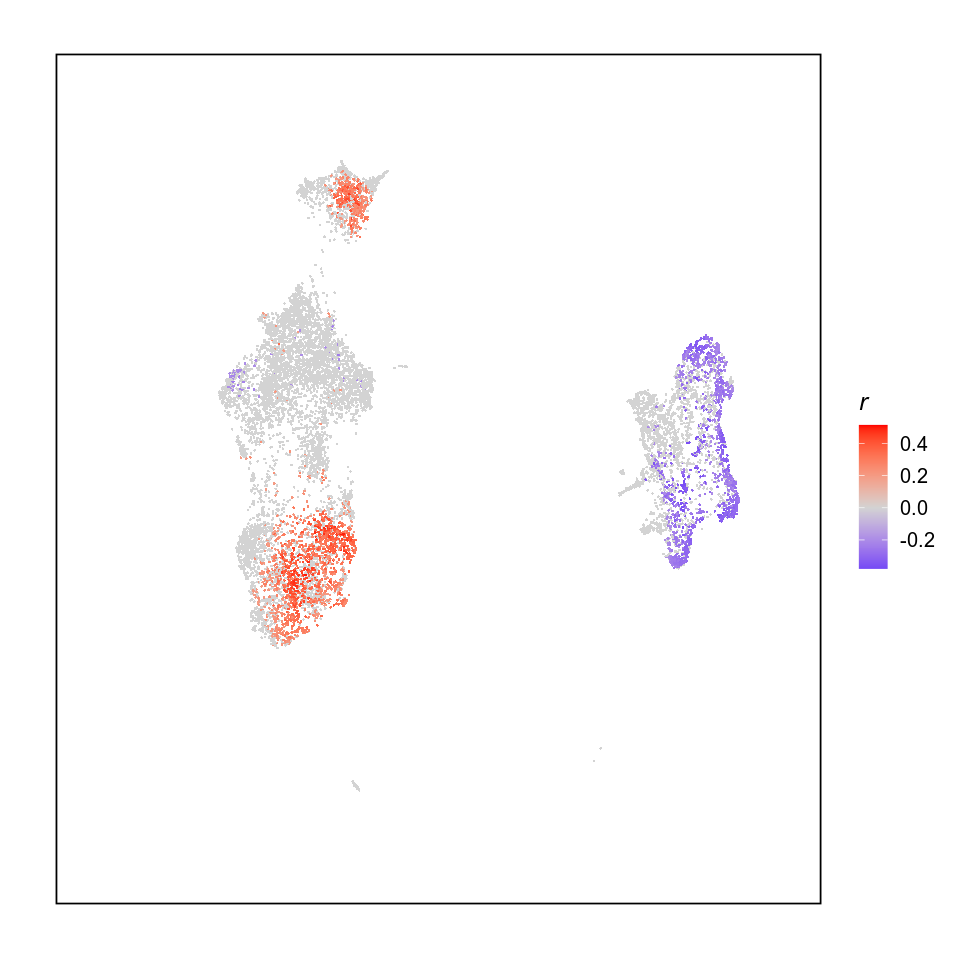

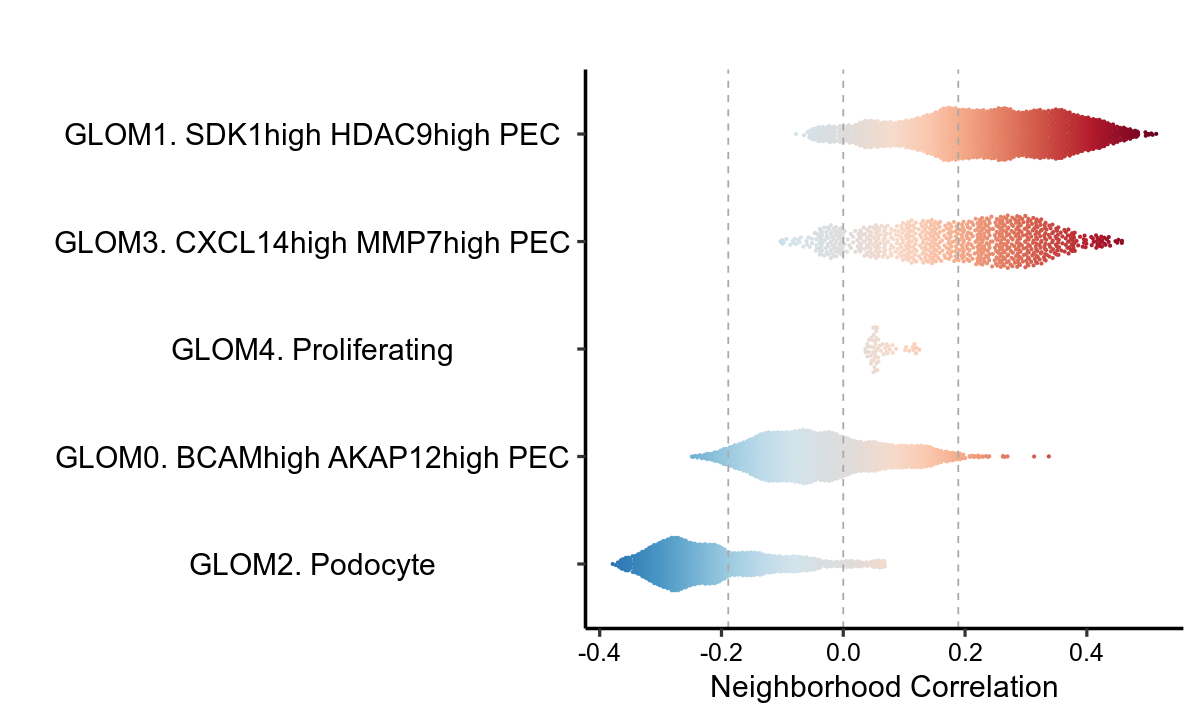

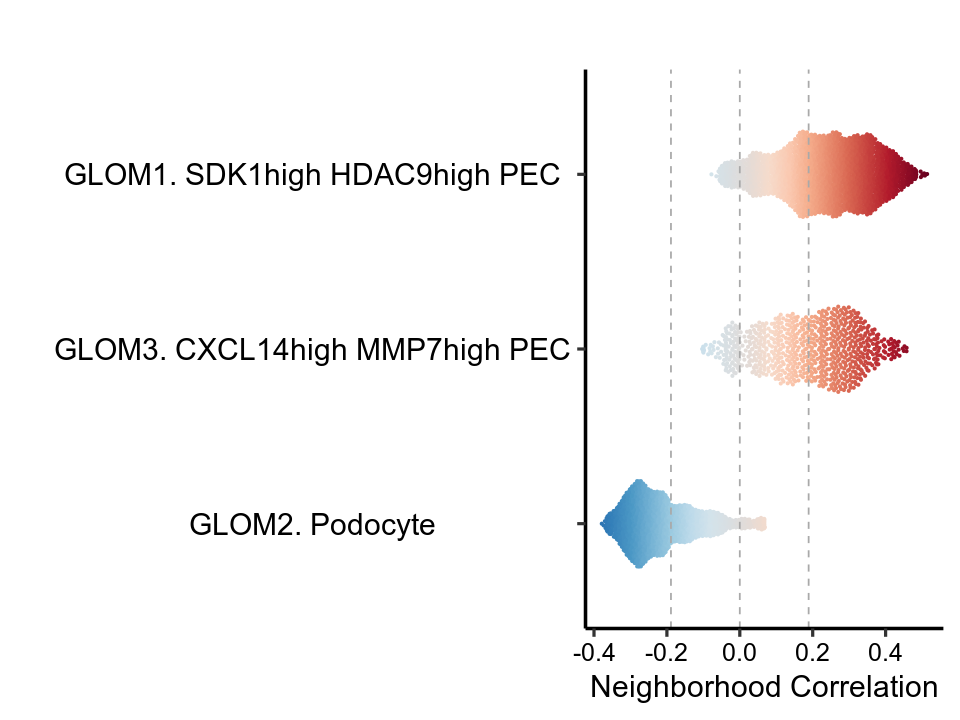

In [11]:
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_meta.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_umap.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_conditional_ncorr.csv", header = FALSE)
fdrs <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_conditional_fdrs.csv", header = FALSE)
colnames(fdrs) <- c('threshold', 'fdr', 'ncells')
meta$ncorr <- ncorr$V1

fdr_5 <- fdrs %>% filter(fdr < 0.05) %>% 
            mutate(fdr = round(fdr, 4)) %>% 
            filter(fdr == max(fdr)) %>% 
            pull(threshold)

tmp_meta <- meta %>% 
                    mutate(ncorr = ifelse(abs(meta$ncorr) > fdr_5, ncorr, NA)) %>% cbind(umap)

fig.size(8, 8)
ggplot() + 
      geom_point(data = glom_meta,
                 aes(x = huwotUMAP1, y = huwotUMAP2), color = 'lightgrey', size = 0.75, stroke = 0.0001) +
      geom_point(
      data = tmp_meta[sample(nrow(tmp_meta)),] %>% rename(correlation = ncorr), 
          aes(x = huwotUMAP1, y = huwotUMAP2, color = correlation),
      size = 0.75, stroke = 0.0001) + 
      scale_color_gradient2(low = 'blue', mid = 'lightgray', high = 'red', na.value = "lightgrey") + 
theme_classic(base_size = 15) +
  theme(
    legend.position = "right",
    plot.title = element_text(hjust = 0.5, 
                                    size = 18, 
                                    face = "bold"),
          axis.title = element_text(hjust = 0.75, 
                                    size = 20, 
                                    face = "bold"), 
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          legend.title = element_text(face = "italic"),
          panel.border = element_rect(colour = "black", fill=NA, size=1)
) +
    labs(x="", y="", title = "", color = "r") + 
scale_x_continuous(limits = c(-10, 12)) +
scale_y_continuous(limits = c(-10, 8)) 

pos_fdr_thresh <- fdr_5
neg_fdr_thresh <- -1 * fdr_5

interval <- c(-max(abs(meta$ncorr)), max(abs(meta$ncorr)))


myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
fig.size(6, 10)

ggplot(meta, aes(y = reorder(final_annotation, ncorr), x = ncorr)) +
    ggbeeswarm::geom_quasirandom(aes(color = ncorr), width = 0.25, size = 0.5) +
    geom_vline(xintercept = neg_fdr_thresh, linetype = "dashed", color = "darkgrey") +
    geom_vline(xintercept = pos_fdr_thresh, linetype = "dashed", color = "darkgrey") +
    geom_vline(xintercept = 0, linetype = "dashed", color = "darkgrey") +
    scale_colour_gradientn(colours = myPalette(20), limits = interval) +
    labs( x= "Neighborhood Correlation", y = "", title = "") +
    theme_classic(base_size = 20) +
    theme(
        legend.position = "none",
        panel.grid = element_blank(),
        axis.text.x = element_text(color = "black", size = 15, hjust=0.5),
        axis.text.y = element_text(color = "black", size = 18, hjust=0.5),
        axis.title = element_text(size=18, hjust = 0.5),
        axis.line.x.bottom = element_line(color = 'black', linewidth = 1),
        axis.line.y.left   = element_line(color = 'black', linewidth = 1))



fig.size(6, 8)

subset <- c('GLOM1. SDK1high HDAC9high PEC', 'GLOM2. Podocyte', 'GLOM3. CXCL14high MMP7high PEC')

violin_plot <- ggplot(meta %>% filter(final_annotation %in% subset), aes(y = reorder(final_annotation, ncorr), x = ncorr)) +
                    ggbeeswarm::geom_quasirandom(aes(color = ncorr), width = 0.25, size = 0.5) +
                    geom_vline(xintercept = neg_fdr_thresh, linetype = "dashed", color = "darkgrey") +
                    geom_vline(xintercept = pos_fdr_thresh, linetype = "dashed", color = "darkgrey") +
                    geom_vline(xintercept = 0, linetype = "dashed", color = "darkgrey") +
                    scale_colour_gradientn(colours = myPalette(20), limits = interval) +
                    labs( x= "Neighborhood Correlation", y = "", title = "") +
                    theme_classic(base_size = 30) +
                    theme(
                        legend.position = "none",
                        panel.grid = element_blank(),
                        axis.text.x = element_text(color = "black", size = 15, hjust=0.5),
                        axis.text.y = element_text(color = "black", size = 18, hjust=0.5),
                        axis.title = element_text(size=18, hjust = 0.5),
                        axis.line.x.bottom = element_line(color = 'black', linewidth = 1),
                        axis.line.y.left   = element_line(color = 'black', linewidth = 1))

In [2]:
glom_norm <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_qcd_norm_12072023.rds')

In [13]:
meta <- meta %>% cbind(umap)

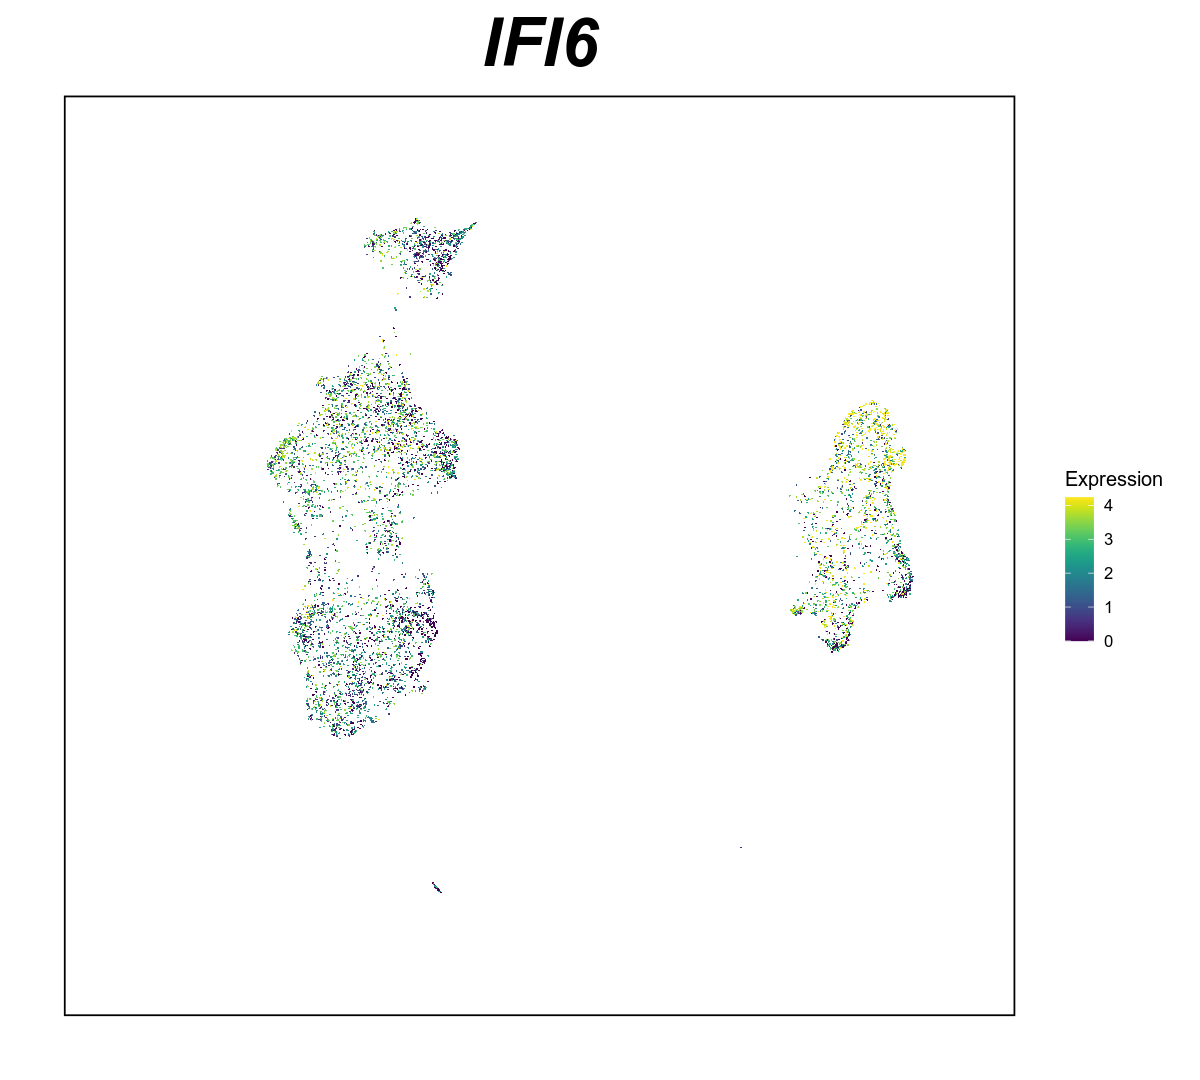

In [35]:
fig.size(9, 10)
plot_shuffled_features(meta, 
                       glom_norm, "IFI6", 
                       pct = 0.95, 
                       pt_size = 0.75) + 
    theme(plot.title = element_text(size = 40),
                    panel.border = element_rect(colour = "black", fill=NA, size=1)) + 
scale_x_continuous(limits = c(-10, 12)) +
scale_y_continuous(limits = c(-10, 8))

In [20]:
cor.test(glom_norm['ISG15', meta$cell], meta$ncorr)


	Pearson's product-moment correlation

data:  glom_norm["ISG15", meta$cell] and meta$ncorr
t = -12.652, df = 7397, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1677745 -0.1231667
sample estimates:
       cor 
-0.1455446 


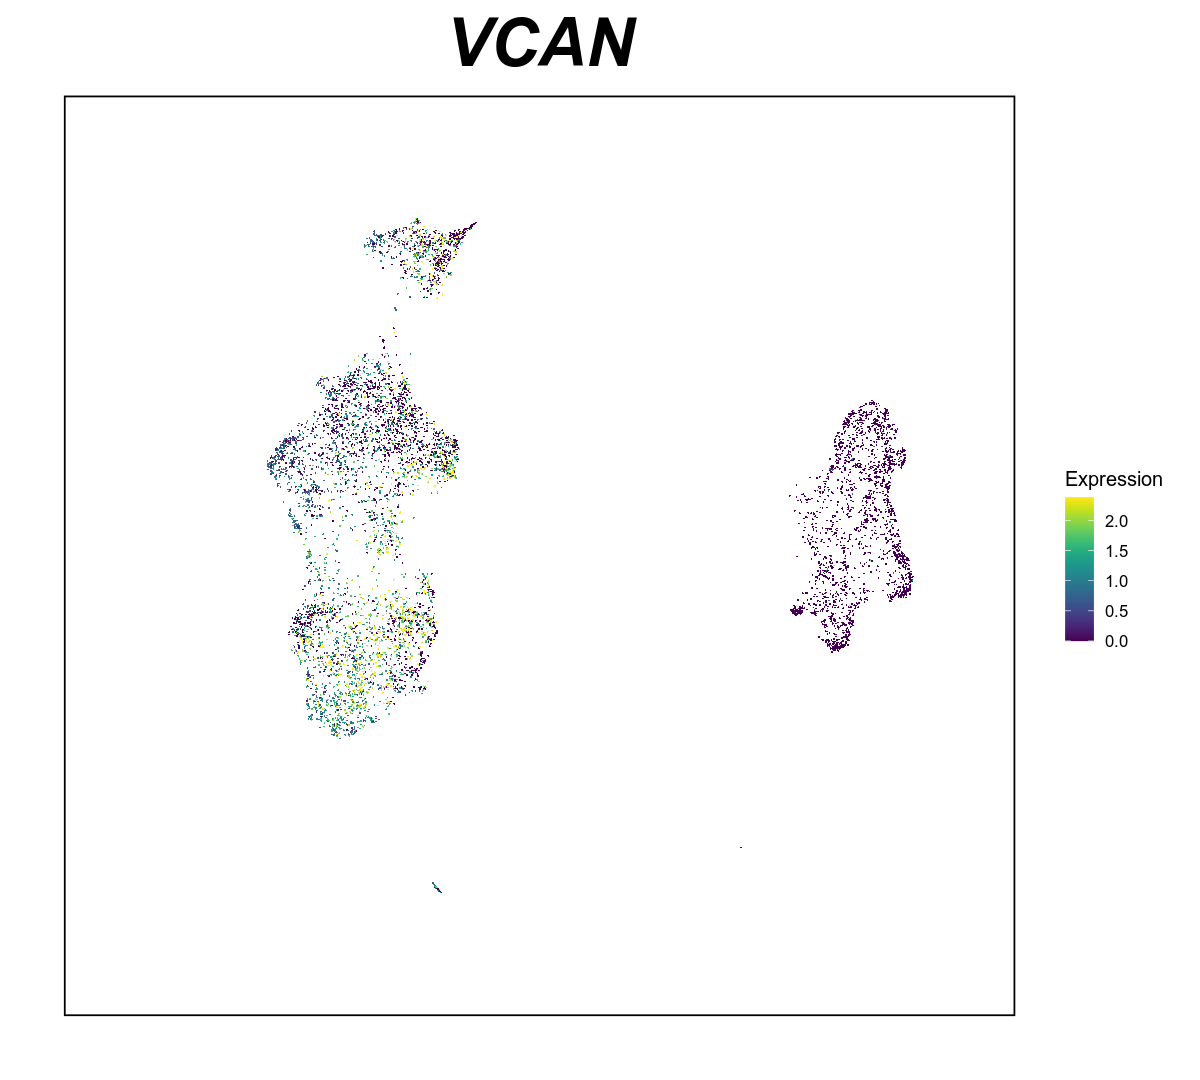

In [34]:
fig.size(9, 10)
plot_shuffled_features(meta, 
                       glom_norm, "VCAN", 
                       pct = 0.95, 
                       pt_size = 0.75) + 
    theme(plot.title = element_text(size = 40),
                    panel.border = element_rect(colour = "black", fill=NA, size=1)) + 
scale_x_continuous(limits = c(-10, 12)) +
scale_y_continuous(limits = c(-10, 8))

In [21]:
cor.test(glom_norm['VCAN', meta$cell], meta$ncorr)


	Pearson's product-moment correlation

data:  glom_norm["VCAN", meta$cell] and meta$ncorr
t = 51.15, df = 7397, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4941322 0.5278019
sample estimates:
      cor 
0.5111631 


In [63]:
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_meta.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_conditional_ncorr.csv", header = FALSE)
meta$ncorr <- ncorr$V1

final_annotation = data.frame("hres.0.20" = seq(0, 4),
                              "final_annotation" = c("GLOM0. BCAMhigh AKAP12high PEC",
                                                     "GLOM1. SDK1high HDAC9high PEC",
                                                     "GLOM2. Podocyte", 
                                                     "GLOM3. CXCL14high MMP7high PEC",
                                                     "GLOM4. Proliferating"))

meta <- left_join(meta, 
                  final_annotation) %>% 
                  mutate(new_cluster_number = hres.0.20)

ci_summary <- meta %>% 
                select(new_cluster_number, cell, ncorr) %>% 
                group_by(new_cluster_number) %>% 
                summarize(ncorr.ci = paste0("(", round(mean(ncorr) - 1.96 * sd(ncorr) / sqrt(length(cell)), 3),
                                      ", ", round(mean(ncorr) + 1.96 * sd(ncorr) / sqrt(length(cell)), 3), ")"))
res <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/masc/glomerular/chronicity_covariates.rds') %>% 
        mutate(new_cluster_number = as.numeric(str_remove(cluster, "cluster")),
               OR.ci = paste0("(", round(Final_Chronicity.OR.95pct.ci.lower, 3), ", ", 
                              round(Final_Chronicity.OR.95pct.ci.upper, 3), ")")) %>% 
        select(new_cluster_number, OR.ci)

summary <- ci_summary %>% left_join(res)
write.table(summary, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_chronicity_corr_04152024.csv', quote = FALSE, row.names = FALSE,
            sep = "\t")

Joining, by = "final_annotation"
Joining, by = "new_cluster_number"


### MASC

In [ ]:
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_meta.csv')

model_df <- meta %>% 
                left_join(glom_meta %>% select(cell,  hres.0.20)) 

res <- MASC.me(model_df, as.factor(model_df$hres.0.20),
                contrast = "Final_Chronicity",
                random_effects = c("sample"),
                fixed_effects = c('First_biop', 'Responder_Status'),
                verbose = TRUE,
                save_models = F) %>%
            dplyr::mutate(bonferroni = p.adjust(model.pvalue, method = "bonferroni")) %>%
            dplyr::arrange(model.pvalue)

In [ ]:
saveRDS(res, '/data/srlab/ssg34/SLE_kidney_v2/data/masc/glomerular/chronicity_covariates.rds')

In [69]:
res <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/masc/glomerular/chronicity_covariates.rds')

In [70]:
res <-  res %>% 
            rowwise() %>% 
            mutate(cluster = paste0("GLOM", str_remove_all(cluster, "cluster")))

Warning message:
“Removed 1 rows containing missing values (`geom_label_repel()`).”


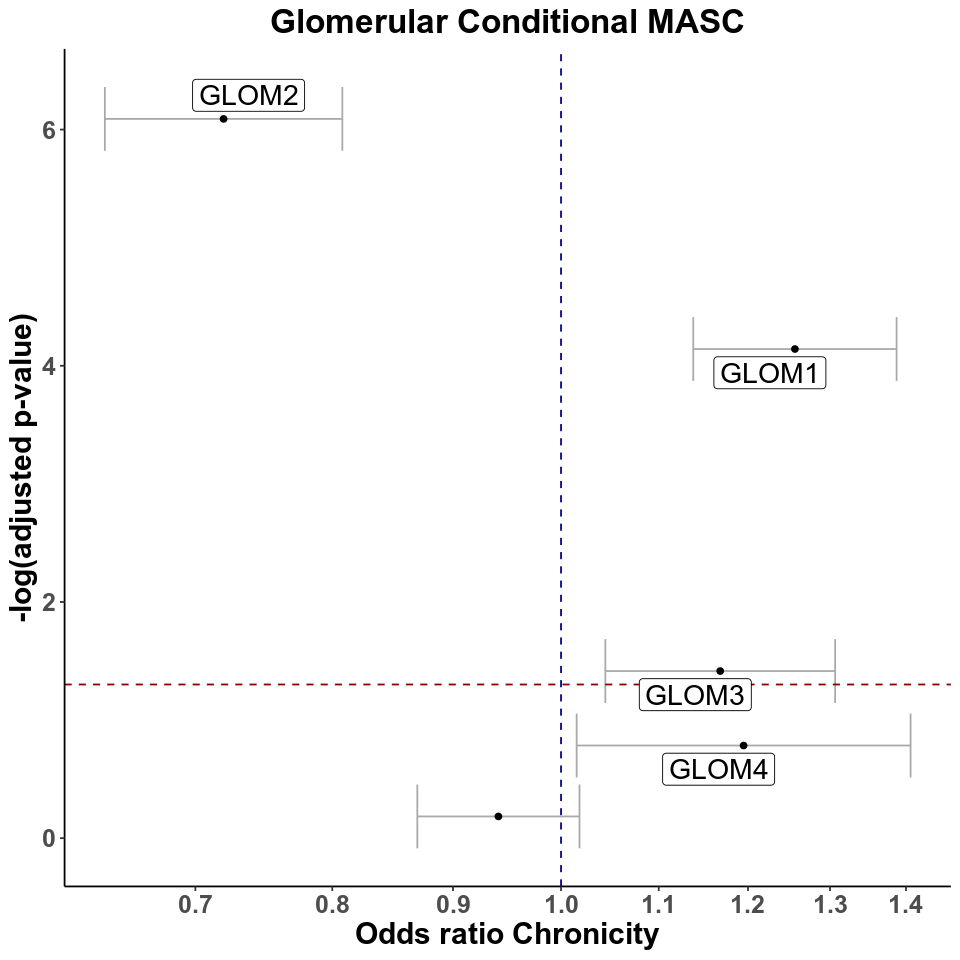

In [71]:
fig.size(8, 8)
ggplot(data = res %>% mutate(label = ifelse(-log10(model.pvalue) > -log10(0.05), cluster, NA)), 
       aes(x = Final_Chronicity.OR, y = -log10(bonferroni))) +
    theme_classic() + ylab("-log(adjusted p-value)") + xlab("Odds ratio Chronicity") +
    labs(title = "Glomerular Conditional MASC") + 
    geom_vline(xintercept = 1, linetype = "dashed", color = "darkblue") +
    geom_errorbar(aes(xmin=Final_Chronicity.OR.95pct.ci.lower, xmax=Final_Chronicity.OR.95pct.ci.upper), col = "darkgrey") +
    geom_point() + 
    geom_hline(yintercept = -log10(.05), linetype = "dashed", color = "darkred") +
    scale_x_log10(breaks = c(0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3 ,1.4)) + 
    ggrepel::geom_label_repel(aes(label = label), size = 6) +
    theme(axis.title = element_text(size = 18, face = "bold"),
          axis.text = element_text(size = 15, face = "bold"),
          plot.title = element_text(size = 20, hjust = 0.5, face = "bold"))

### DE

In [91]:
de <- function(feature, df) {
    model_df <- df %>% select(feature, sample, First_biop, Responder_Status, 
                              Final_Chronicity, avg_count, avg_mt) %>% rename(Exp = feature)
    if (sum(model_df$Exp > 0) > 0.05 * nrow(model_df)) { 
        m_0 <- lm(Exp ~ log(avg_count) + avg_mt, data = model_df)
        m_1 <- lm(Exp ~ log(avg_count) + avg_mt + Final_Chronicity, data = model_df)
        ANNO <- anova(m_0, m_1)
        LRP <- ANNO[2,6]
        F <- ANNO[2,5]
        Beta <- summary(m_1)$coefficients['Final_Chronicity', 'Estimate']
        SE <- summary(m_1)$coefficients['Final_Chronicity', 'Std. Error']
        res <- c(gene = feature, LRP = LRP, F = F, Beta = Beta, SE = SE)
    }
    else {
        res <- c(gene = feature, LRP = NA, F = NA, Beta = NA, SE = NA)
    }
    return(res)
}

In [92]:
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_meta.csv')
glom_pb <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_norm_pseudobulk_12072023.rds')

In [93]:
glom_pb <- glom_pb %>% 
                filter(sample %in% unique(meta$sample)) %>% 
                left_join(meta %>% 
                              select(sample, First_biop, Responder_Status, Final_Chronicity) %>% 
                              unique())

Joining, by = "sample"


In [94]:
de_out <- mclapply(colnames(glom_pb)[1:36601], de, glom_pb, mc.cores = 20)

In [95]:
de_df <- data.frame(do.call(rbind, de_out)) %>% mutate(LRP = as.numeric(LRP),
                                                       F = as.numeric(F),
                                                       Beta = as.numeric(Beta),
                                                       SE = as.numeric(SE))

In [96]:
saveRDS(de_df, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_chronicity_differential_expression_03082024.rds')

In [97]:
de_df <- de_df %>% 
            na.omit() %>% 
            arrange(LRP) %>% 
            mutate(FDR = p.adjust(LRP, method = "BH")) 

In [110]:
genes <- c("MMP7", "WFDC2", "SPP1", "VCAN", "KRT19", 
           "IFI6", "PODXL", "VEGFA", "CLIC5", "KLK6")

Warning message:
“Removed 22352 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 37 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


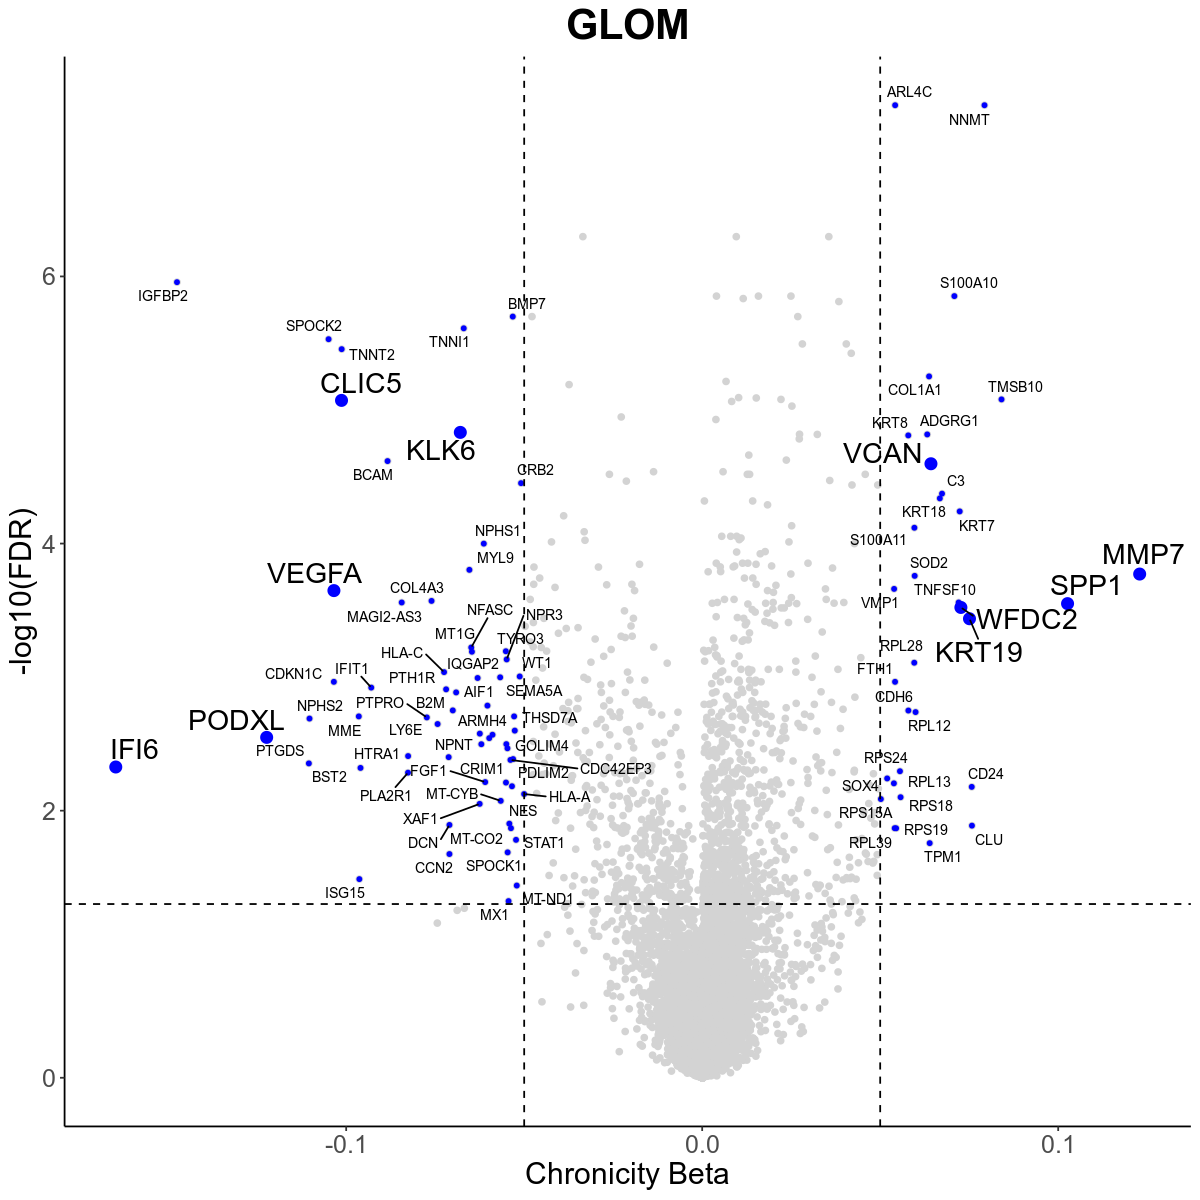

In [111]:
fig.size(10, 10)
ggplot(de_df,
                aes(x = Beta, y = -log10(FDR))) +
    geom_point(colour = 'lightgrey') + 
    geom_point(data = de_df %>% filter(FDR < 0.05 & abs(Beta) >= 0.05,
                                        ! gene %in% genes),
                   aes(x = Beta, y = -log10(FDR)),  color = "blue", size = 1) +
    geom_point(data = de_df %>% filter(gene %in% genes),
                   aes(x = Beta, y = -log10(FDR)),  color = "blue", size = 3)  + 
    geom_vline(xintercept = c(-0.05, 0.05), linetype = "dashed") + 
    geom_hline(yintercept = -log10(0.05), linetype = "dashed") + 
    theme_classic() + 
    theme(legend.position = "none",
          axis.text = element_text(size = 15),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 25, hjust = 0.5, face = "bold")) +
    ggrepel::geom_text_repel(data = de_df %>% 
                                     mutate(label = ifelse(FDR < 0.05 & abs(Beta) >= 0.05 | 
                                                           gene %in% genes, gene, NA),
                                            label_size = ifelse(gene %in% genes, 6 , 3)),
                                     aes(x = Beta, y = -log10(FDR), 
                                         size = label_size, label = label)
            , color = "black") +
    scale_size_identity() + 
    labs(x = "Chronicity Beta", y = "-log10(FDR)", title = "GLOM")

## ACTIVITY

In [19]:
meta <- sc_meta %>% select(-c(colnames(sc_meta[grep('hPC-', colnames(sc_meta))]), 
                          colnames(sc_meta[grep('huwotUMAP', colnames(sc_meta))])))
harmony <- sc_meta %>% select(colnames(sc_meta)[grep('hPC-', colnames(sc_meta))])

umap <- sc_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Final_Activity)]
meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")

write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sc_meta.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sc_harmony.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sc_umap.csv', 
          row.names = FALSE, quote = FALSE)

Joining, by = "Responder.Status"


In [20]:
meta <- sn_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('huwotUMAP', colnames(sn_meta))])))

harmony <- sn_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sn_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Final_Activity)]
meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")

write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sn_meta.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sn_harmony.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sn_umap.csv', 
          row.names = FALSE, quote = FALSE)

Joining, by = "Responder.Status"


### RESULTS

In [ ]:
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sc_meta.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sc_umap.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sc_chronicity_cond_ncorr.csv", header = FALSE)
fdrs <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sc_chronicity_cond_fdrs.csv", header = FALSE)
colnames(fdrs) <- c('threshold', 'fdr', 'ncells')
meta$ncorr <- ncorr$V1

fdr_10 <- fdrs %>% filter(fdr < 0.1) %>% 
            mutate(fdr = round(fdr, 4)) %>% 
            filter(fdr == max(fdr)) %>% 
            pull(threshold)

tmp_meta <- meta %>% 
                    mutate(ncorr = ifelse(abs(meta$ncorr) > fdr_10, ncorr, NA)) 
tmp_meta <- tmp_meta %>% left_join(all_meta %>% select(cell, huwotUMAP1, huwotUMAP2))

fig.size(8, 8)
ggplot() + 
      geom_point(data = glom_meta,
                 aes(x = huwotUMAP1, y = huwotUMAP2), color = 'lightgrey', alpha = 0.1) +
      geom_point(
      data = tmp_meta[sample(nrow(tmp_meta)),] %>% rename(correlation = ncorr), 
          aes(x = huwotUMAP1, y = huwotUMAP2, color = correlation)) + 
      scale_color_gradient2(low = 'blue', mid = 'lightgray', high = 'red', na.value = "lightgrey") + 
      labs(x="UMAP1", y="UMAP2", title = "Neighborhood Correlation: p = 9.99e-05") +
      theme_bw(base_size = 15) +
  theme( legend.position = "none",
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", hjust = 0.5, face = "bold", size=20)
  ) 

In [ ]:
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sn_meta.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sn_umap.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sn_chronicity_cond_ncorr.csv", header = FALSE)
fdrs <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/activity/sn_chronicity_cond_fdrs.csv", header = FALSE)
colnames(fdrs) <- c('threshold', 'fdr', 'ncells')
meta$ncorr <- ncorr$V1

fdr_10 <- fdrs %>% filter(fdr < 0.1) %>% 
            mutate(fdr = round(fdr, 4)) %>% 
            filter(fdr == max(fdr)) %>% 
            pull(threshold)

tmp_meta <- meta %>% 
                    mutate(ncorr = ifelse(abs(meta$ncorr) > fdr_10, ncorr, NA)) 
tmp_meta <- tmp_meta %>% left_join(all_meta %>% select(cell, huwotUMAP1, huwotUMAP2))

fig.size(8, 8)
ggplot() + 
      geom_point(data = glom_meta,
                 aes(x = huwotUMAP1, y = huwotUMAP2), color = 'lightgrey', alpha = 0.1) +
      geom_point(
      data = tmp_meta[sample(nrow(tmp_meta)),] %>% rename(correlation = ncorr), 
          aes(x = huwotUMAP1, y = huwotUMAP2, color = correlation)) + 
      scale_color_gradient2(low = 'blue', mid = 'lightgray', high = 'red', na.value = "lightgrey") + 
      labs(x="UMAP1", y="UMAP2", title = "Neighborhood Correlation: p = 9.99e-05") +
      theme_bw(base_size = 15) +
  theme( legend.position = "none",
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", hjust = 0.5, face = "bold", size=20)
  ) 

## ISN

In [40]:
meta <- sc_meta %>% select(-c(colnames(sc_meta[grep('hPC-', colnames(sc_meta))]), 
                          colnames(sc_meta[grep('huwotUMAP', colnames(sc_meta))])))
harmony <- sc_meta %>% select(colnames(sc_meta)[grep('hPC-', colnames(sc_meta))])

umap <- sc_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Final_ISN)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")
write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/ISN/sc_meta.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/ISN/sc_harmony.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/ISN/sc_umap.csv', 
          row.names = FALSE, quote = FALSE)

Joining, by = "Responder.Status"


In [41]:
meta <- sn_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('huwotUMAP', colnames(sn_meta))])))
harmony <- sn_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sn_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Final_ISN)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")
write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/ISN/sn_meta.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/ISN/sn_harmony.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/ISN/sn_umap.csv', 
          row.names = FALSE, quote = FALSE)

Joining, by = "Responder.Status"


## % INJURED PT

In [4]:
lateinjury_high_prop <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/injured_pt_highprop_singlecell_05102024.rds') %>% 
                            select(Prop, sample)

In [5]:
meta <- sc_meta %>% select(-c(colnames(sc_meta[grep('hPC-', colnames(sc_meta))]), 
                          colnames(sc_meta[grep('huwotUMAP', colnames(sc_meta))])))
harmony <- sc_meta %>% select(colnames(sc_meta)[grep('hPC-', colnames(sc_meta))])

umap <- sc_meta %>% select(c(huwotUMAP1, huwotUMAP2))

meta <- meta %>% left_join(lateinjury_high_prop %>% rename(injured_pt_prop = Prop))

ind <- c(1:nrow(meta))[!is.na(meta$injured_pt_prop)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)


meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")

write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sc_meta.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sc_harmony.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sc_umap.csv', 
          row.names = FALSE, quote = FALSE)

Joining, by = "sample"
Joining, by = "Responder.Status"


In [6]:
meta <- sn_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('huwotUMAP', colnames(sn_meta))])))
harmony <- sn_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sn_meta %>% select(c(huwotUMAP1, huwotUMAP2))

meta$individual <- str_remove(meta$sample, "AMPSLEkid_nuc_")

meta <- meta %>% 
            left_join(lateinjury_high_prop %>% 
                       ungroup() %>% 
                       rename(injured_pt_prop = Prop) %>% 
                       mutate(individual = str_remove(as.character(sample), 
                                                      "AMPSLEkid_cells_")) %>%
                       select(individual, injured_pt_prop))


ind <- c(1:nrow(meta))[!is.na(meta$injured_pt_prop)]

meta <- meta[ind, ]
harmony <- harmony[ind, ]
umap <- umap[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))

meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Responder.Status = c("NR", "PR", "CR"),
                                      Responder_Status = c(0, 1, 2)))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)


meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")

write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sn_meta.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sn_harmony.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sn_umap.csv', 
          row.names = FALSE, quote = FALSE)

Joining, by = "individual"
Joining, by = "Responder.Status"


### RESULTS

In [6]:
pt_meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sc_meta.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sc_umap.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sc_cond_ncorr.csv", header = FALSE)
pt_meta$ncorr <- ncorr$V1

meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_meta.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_umap.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_conditional_ncorr.csv", header = FALSE)
meta$ncorr <- ncorr$V1

In [7]:
ncorr_meta <- pt_meta %>% 
                    select(cell, ncorr) %>% 
                    rename(pt_ncorr = ncorr) %>% 
                left_join(meta %>% 
                            select(cell, ncorr) %>% 
                            rename(chronicity_ncorr = ncorr)) %>% na.omit()

Joining, by = "cell"


[1] 0.7089212

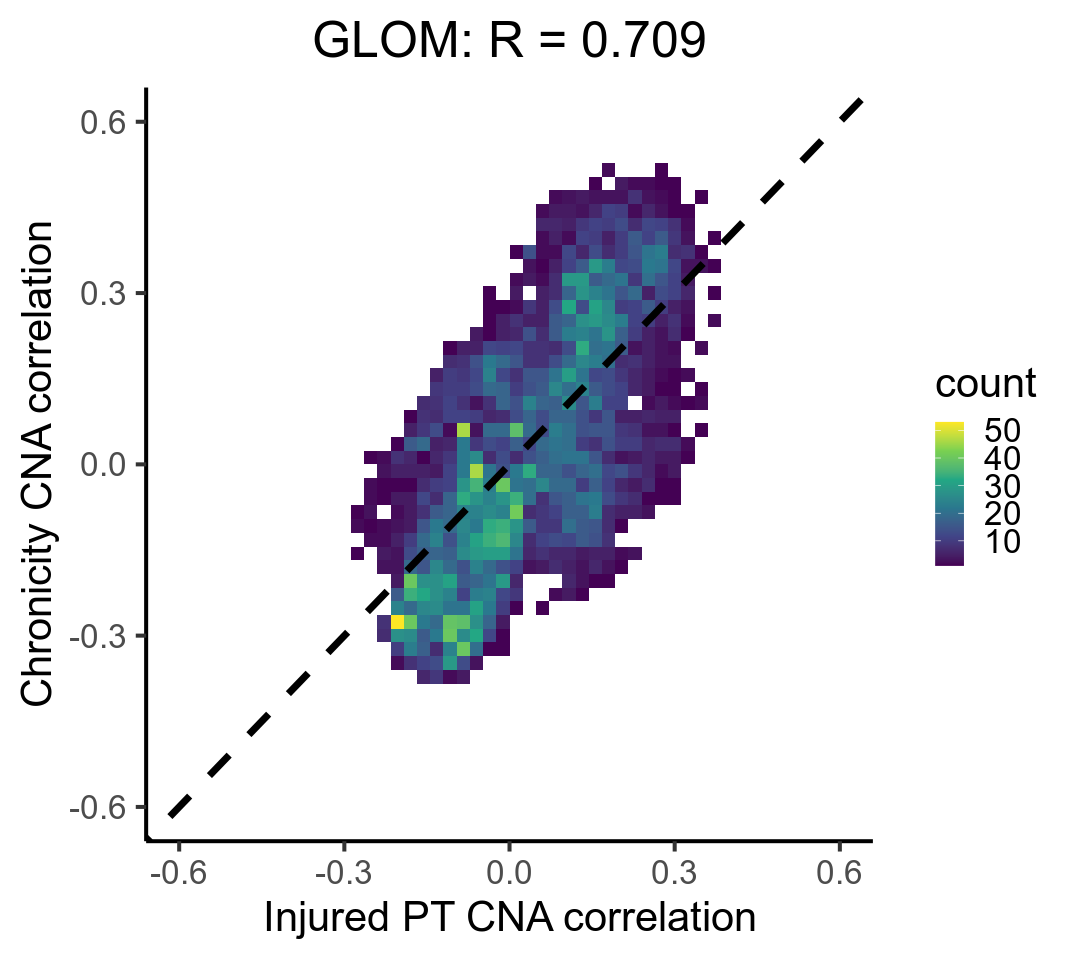

In [9]:
fig.size(8, 9)
cor(ncorr_meta$pt_ncorr, ncorr_meta$chronicity_ncorr)
cor_plot <- ggplot(ncorr_meta, aes(x = pt_ncorr, y = chronicity_ncorr)) +
                    geom_bin2d(bins = 50) +
                    scale_fill_continuous(type = "viridis",
                                          breaks = c(10, 20, 30, 40, 50)) +
                   theme_classic(base_size = 25) +
                    geom_abline(linetype = 'dashed', linewidth = 2) + 
                    scale_x_continuous(limits = c(-0.6, 0.6)) + 
                    scale_y_continuous(limits = c(-0.6, 0.6)) + 
                    labs(x = "Injured PT CNA correlation",
                         y = "Chronicity CNA correlation",
                         title = "GLOM: R = 0.709") + 
                    theme(
                          plot.title = element_text(size = 30, 
                                                    hjust = 0.5),
                            text=element_text(family="Arial"))

cor_plot

cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/main_figures/figure6/figure6d.png",
       cor_plot,
       base_height = 8,
       base_width = 9)

### CNA

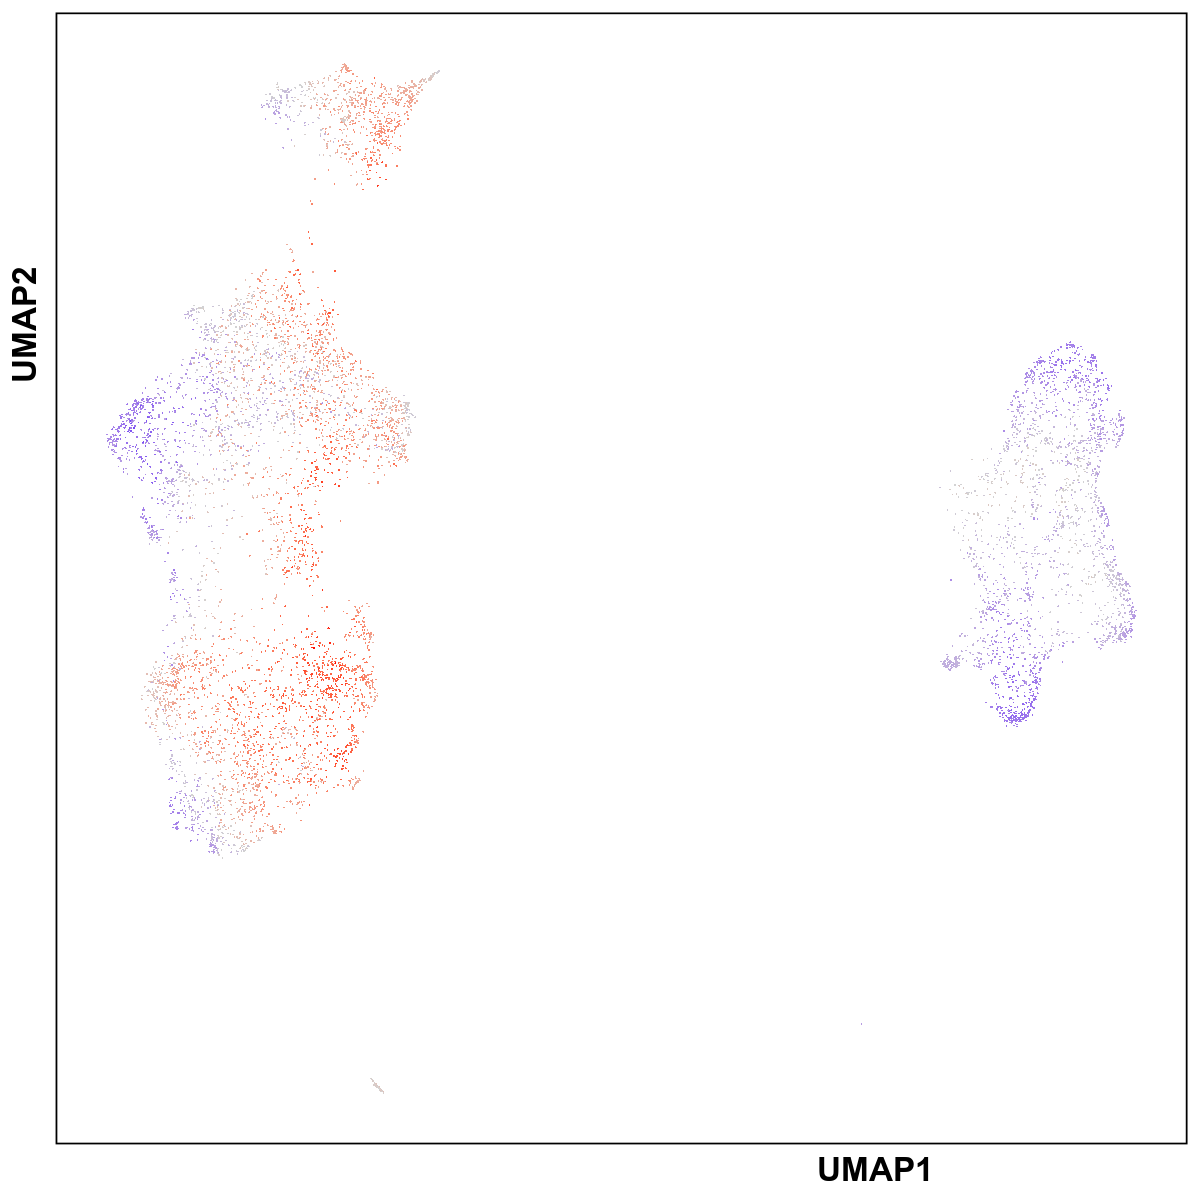

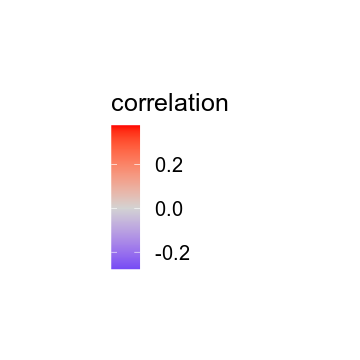

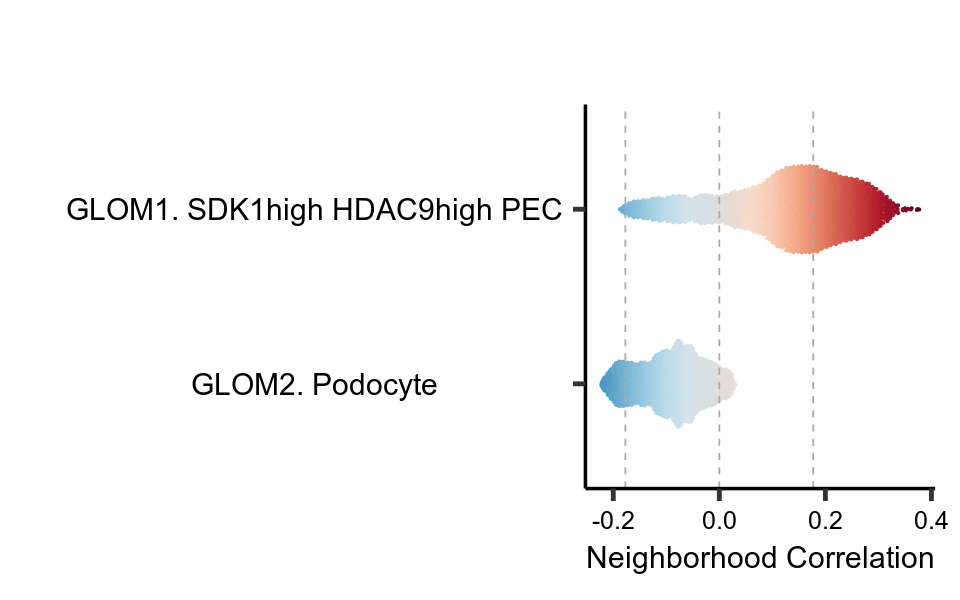

In [10]:
options(warn=-1)
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sc_meta.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sc_umap.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sc_cond_ncorr.csv", header = FALSE)
fdrs <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sc_cond_fdrs.csv", header = FALSE)
colnames(fdrs) <- c('threshold', 'fdr', 'ncells')
meta$ncorr <- ncorr$V1


fdr <- fdrs %>% 
            filter(fdr < 0.05) %>% 
            mutate(fdr = round(fdr, 4)) %>% 
            filter(fdr == max(fdr)) %>% 
            pull(threshold)

tmp_meta <- meta %>% mutate(ifelse(abs(meta$ncorr) > fdr, ncorr, NA))
tmp_meta <- cbind(tmp_meta, umap)

fig.size(8, 8)
cna_umap <- ggplot() + 
      geom_point(data = tmp_meta,
                aes(x = huwotUMAP1, y = huwotUMAP2), color = 'lightgrey', size = 0.75, stroke = 0.0001, shape = 20) + 
      geom_point(
      data = tmp_meta[sample(nrow(tmp_meta)),] %>% rename(correlation = ncorr), 
          aes(x = huwotUMAP1, y = huwotUMAP2, color = correlation), size = 0.75, stroke = 0.0001, shape = 20) + 
      scale_color_gradient2(low = 'blue', mid = 'lightgray', high = 'red', na.value = "lightgrey") + 
     # labs(x="UMAP1", y="UMAP2", title = "Myeloid Chronicity: p = 2.00e-04") +
theme_classic(base_size = 15) +
      theme(
        legend.position = "right",
            #  plot.title = element_text(hjust = 0.5, 
            #                            size = 18, 
            #                            face = "bold"),
              axis.title = element_text(hjust = 0.75, 
                                        size = 20, 
                                        face = "bold"), 
              axis.text = element_blank(),
              axis.line = element_blank(),
              axis.ticks = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=1)
    ) +
        labs(x = "UMAP1", y = "UMAP2") + 
    theme(text=element_text(family="Arial")) 
umap_legend <- cowplot::get_legend(cna_umap)
cna_umap <- cna_umap + theme(legend.position = "none")
umap_legend <- cowplot::plot_grid(umap_legend)
fig.size(10, 10)
cna_umap
fig.size(3, 3)
umap_legend

cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/main_figures/figure6/figure6c-cna_umap.png",
       cna_umap,
       base_height = 10,
       base_width = 10)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/main_figures/figure6/figure6c-cna_umap_legend.png",
       umap_legend,
       base_height = 3,
       base_width = 3)
options(warn=0)

pos_fdr_thresh <- fdr
neg_fdr_thresh <- -1 * fdr

interval <- c(-max(abs(meta$ncorr)), max(abs(meta$ncorr)))


myPalette <- colorRampPalette(c(RColorBrewer::brewer.pal(11, "RdBu")[11:7], "#DCDCDC", RColorBrewer::brewer.pal(11, "RdBu")[5:1]))
subset <- c('GLOM1. SDK1high HDAC9high PEC', 'GLOM2. Podocyte')

violin_plot <- ggplot(meta %>% filter(final_annotation %in% subset), aes(y = reorder(final_annotation, ncorr), x = ncorr)) +
                    ggbeeswarm::geom_quasirandom(aes(color = ncorr), width = 0.25, size = 0.5) +
                    geom_vline(xintercept = neg_fdr_thresh, linetype = "dashed", color = "darkgrey") +
                    geom_vline(xintercept = pos_fdr_thresh, linetype = "dashed", color = "darkgrey") +
                    geom_vline(xintercept = 0, linetype = "dashed", color = "darkgrey") +
                    scale_colour_gradientn(colours = myPalette(20), limits = interval) +
                    labs( x= "Neighborhood Correlation", y = "", title = "") +
                    theme_classic(base_size = 30) +
                    theme(text=element_text(family="Arial"),
                        legend.position = "none",
                        panel.grid = element_blank(),
                        axis.text.x = element_text(color = "black", size = 15, hjust=0.5),
                        axis.text.y = element_text(color = "black", size = 18, hjust=0.5),
                        axis.title = element_text(size=18, hjust = 0.5),
                        axis.line.x.bottom = element_line(color = 'black', linewidth = 1),
                        axis.line.y.left   = element_line(color = 'black', linewidth = 1))
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/main_figures/figure6/figure6c-violin_plot.png",
       violin_plot,
       base_height = 5,
       base_width = 8)
fig.size(5, 8)
violin_plot

### MASC

In [4]:
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sc_meta.csv')
model_df <- meta %>% 
                left_join(glom_meta %>% select(cell,  hres.0.20, nCount_RNA, percent.mt)) %>% 
                mutate(nCount_RNA = log(nCount_RNA))

res <- MASC.me(model_df, as.factor(model_df$hres.0.20),
                contrast = "injured_pt_prop",
                random_effects = c("sample"),
                fixed_effects = c("nCount_RNA", 
                                  "percent.mt",
                                  'Final_Site_JHU',
                                  'Final_Site_NYU',
                                  'First_biop',
                                  'Responder_Status',
                                  'Age',
                                  'Final_Chronicity'),
                verbose = TRUE,
                save_models = F) %>%
            dplyr::mutate(bonferroni = p.adjust(model.pvalue, method = "bonferroni")) %>%
            dplyr::arrange(model.pvalue)
saveRDS(res, '/data/srlab/ssg34/SLE_kidney_v2/data/masc/glomerular/injured_pt_cond.rds')

Joining, by = "cell"
Using null model: cluster ~ nCount_RNA + percent.mt + Final_Site_JHU + Final_Site_NYU + First_biop + Responder_Status + Age + Final_Chronicity + (1|sample)

Creating logistic mixed models for cluster0

Creating logistic mixed models for cluster1

Creating logistic mixed models for cluster2

Creating logistic mixed models for cluster3

Creating logistic mixed models for cluster4



In [2]:
res <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/masc/glomerular/injured_pt_cond.rds')
res <-  res %>% 
            rowwise() %>% 
            mutate(cluster = paste0("GLOM", unlist(str_split(cluster, 'cluster'))[2]))

Warning message:
“Removed 3 rows containing missing values (`geom_label_repel()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_label_repel()`).”


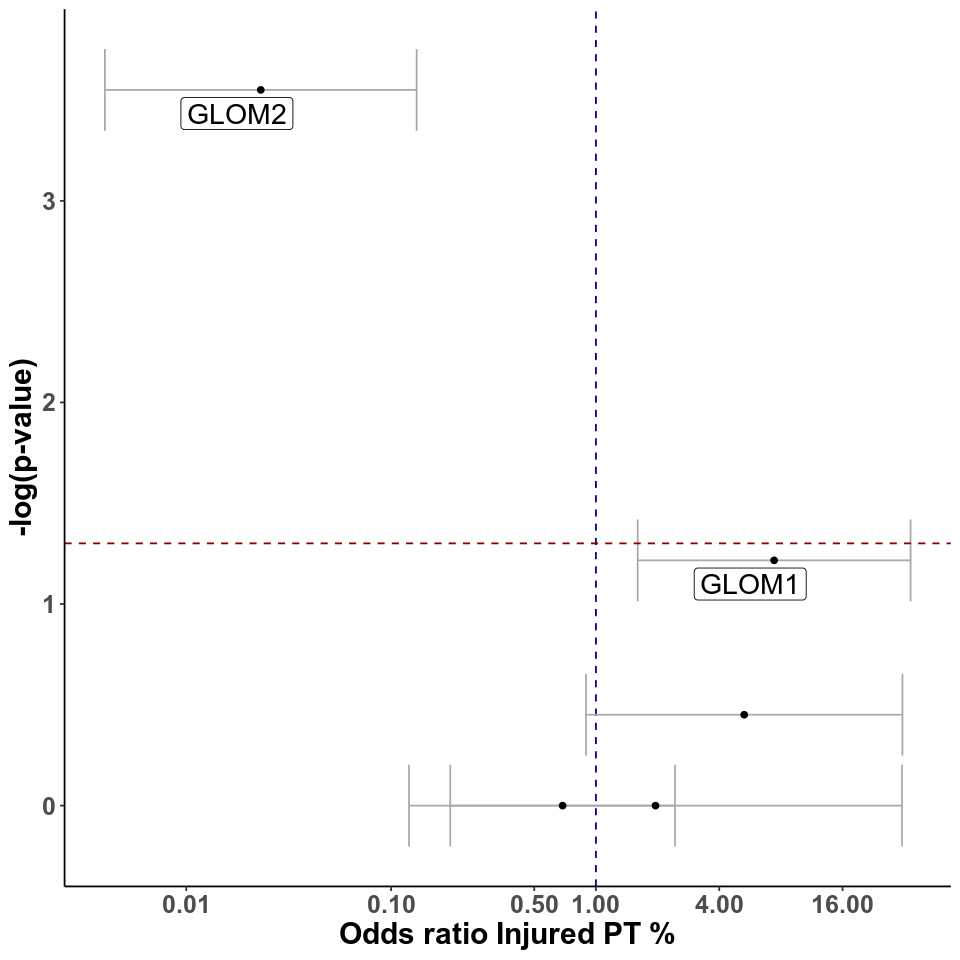

In [11]:
fig.size(8, 8)
masc_plot <- ggplot(data = res %>% 
                               mutate(label = ifelse(model.pvalue < 0.05, cluster, NA)), 
                   aes(x = injured_pt_prop.OR, y = -log10(bonferroni))) +
                theme_classic() + ylab("-log(p-value)") + xlab("Odds ratio Injured PT %") +
                geom_vline(xintercept = 1, linetype = "dashed", color = "darkblue") +
                geom_errorbar(aes(xmin=injured_pt_prop.OR.95pct.ci.lower, 
                                  xmax=injured_pt_prop.OR.95pct.ci.upper), col = "darkgrey") +
                geom_point() + 
                geom_hline(yintercept = -log10(0.05), linetype = "dashed", color = "darkred") +
                scale_x_log10(breaks = c(0.0001, 0.01, 0.1, 0.5, 1, 4, 16, 64)) + 
                ggrepel::geom_label_repel(aes(label = label), size = 6) +
                theme(text=element_text(family="Arial"),
                      axis.title = element_text(size = 18, face = "bold"),
                      axis.text = element_text(size = 15, face = "bold"))
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/supplemental_figures/figure10/figure10b.png",
       masc_plot,
       base_height = 8,
       base_width = 8)
masc_plot

### DE

In [2]:
de <- function(feature, df) {
    model_df <- df %>% select(feature, sample,  
                              injured_pt_prop, avg_count, avg_mt) %>% rename(Exp = feature)
    if (sum(model_df$Exp > 0) > 0.1 * nrow(model_df)) { 
        m_0 <- lm(Exp ~ log(avg_count) + avg_mt, data = model_df)
        m_1 <- lm(Exp ~ log(avg_count) + avg_mt + injured_pt_prop, data = model_df)
        ANNO <- anova(m_0, m_1)
        LRP <- ANNO[2,6]
        F <- ANNO[2,5]
        Beta <- summary(m_1)$coefficients['injured_pt_prop', 'Estimate']
        SE <- summary(m_1)$coefficients['injured_pt_prop', 'Std. Error']
        res <- c(gene = feature, LRP = LRP, F = F, Beta = Beta, SE = SE)
    }
    else {
        res <- c(gene = feature, LRP = NA, F = NA, Beta = NA, SE = NA)
    }
    return(res)
}

In [3]:
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/injured_pt/sc_meta.csv')
glom_pb <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_norm_pseudobulk_12072023.rds')

In [ ]:
glom_pb <- glom_pb %>% 
                filter(sample %in% unique(meta$sample)) %>% 
                left_join(meta %>% 
                              select(sample, First_biop, Responder_Status, injured_pt_prop) %>% 
                              unique())

In [ ]:
de_out <- mclapply(colnames(glom_pb)[1:36601], de, glom_pb, mc.cores = 20)

In [17]:
de_df <- data.frame(do.call(rbind, de_out)) %>% mutate(LRP = as.numeric(LRP),
                                                       F = as.numeric(F),
                                                       Beta = as.numeric(Beta),
                                                       SE = as.numeric(SE))

In [18]:
saveRDS(de_df, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_injured_pt_differential_expression_08102024.rds')

In [15]:
de_df <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_injured_pt_differential_expression_08102024.rds')
de_df <- de_df %>% 
            na.omit() %>% 
            arrange(LRP) %>% 
            mutate(FDR = p.adjust(LRP, method = "BH")) 

In [11]:
filter_genes <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_5pgenes_de.rds')

In [18]:
de_df <- de_df %>% filter(gene %in% filter_genes$gene)

Warning message:
“Removed 12503 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 12503 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


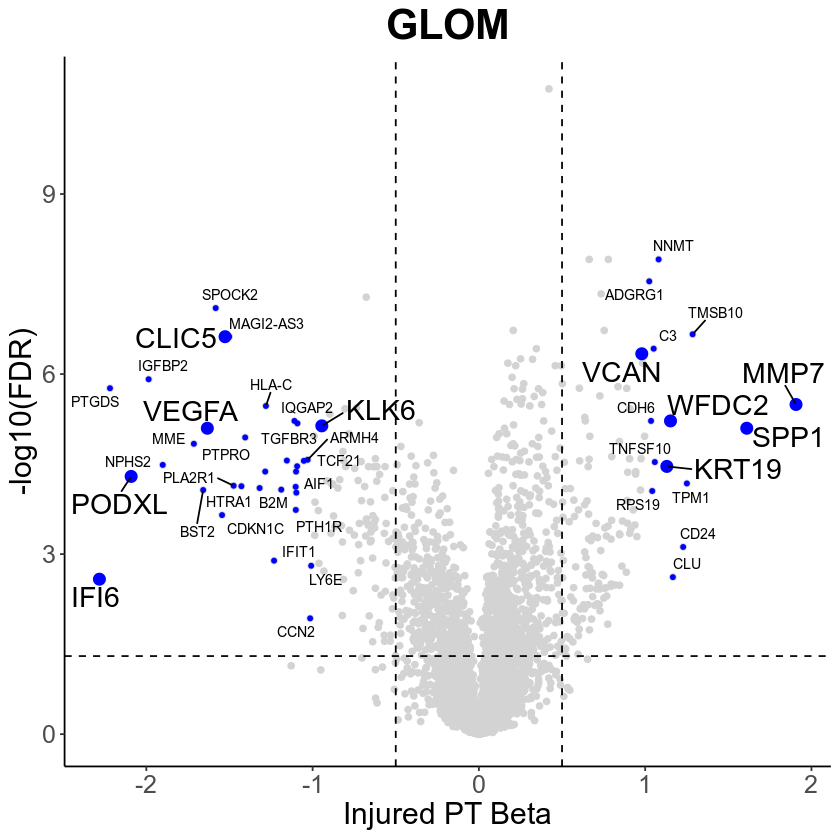

In [20]:
genes <- c("MMP7", "WFDC2", "SPP1", "VCAN", "KRT19", 
           "IFI6", "PODXL", "VEGFA", "CLIC5", "KLK6")

de_plot <- ggplot(de_df,
                aes(x = Beta, y = -log10(FDR))) +
    geom_point(colour = 'lightgrey') + 
    geom_point(data = de_df %>% filter(FDR < 0.05 & abs(Beta) >= 1,
                                        ! gene %in% genes),
                   aes(x = Beta, y = -log10(FDR)),  color = "blue", size = 1) +
    geom_point(data = de_df %>% filter(gene %in% genes),
                   aes(x = Beta, y = -log10(FDR)),  color = "blue", size = 3)  + 
    geom_vline(xintercept = c(-0.5, 0.5), linetype = "dashed") + 
    geom_hline(yintercept = -log10(0.05), linetype = "dashed") + 
    theme_classic() + 
    theme(text=element_text(family="Arial"),
          legend.position = "none",
          axis.text = element_text(size = 15),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 25, hjust = 0.5, face = "bold")) +
    ggrepel::geom_text_repel(data = de_df %>% 
                                     mutate(label = ifelse(FDR < 0.05 & abs(Beta) >= 1 | 
                                                           gene %in% genes, gene, NA),
                                            label_size = ifelse(gene %in% genes, 6 , 3)),
                                     aes(x = Beta, y = -log10(FDR), 
                                         size = label_size, label = label)
            , color = "black") +
    scale_size_identity() + 
    labs(x = "Injured PT Beta", y = "-log10(FDR)", title = "GLOM")
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/supplemental_figures/figure10/figure10g.png",
       de_plot,
       base_height = 8,
       base_width = 8)
de_plot

In [24]:
injured_pt_de <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_injured_pt_differential_expression_08102024.rds') %>% 
            na.omit() %>% 
            arrange(LRP) %>% 
            mutate(FDR = p.adjust(LRP, method = "BH")) %>% 
            filter(FDR < 0.05) %>% 
            filter(gene %in% filter_genes$gene)
chron_de <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/GLOM_chronicity_differential_expression_03082024.rds')%>% 
            na.omit() %>% 
            arrange(LRP) %>% 
            mutate(FDR = p.adjust(LRP, method = "BH")) %>% 
            filter(FDR < 0.05) %>% 
            filter(gene %in% filter_genes$gene)

In [25]:
plot_df <- chron_de %>% 
                rename(Chron_Beta = Beta) %>% 
                select(gene, Chron_Beta) %>% 
                left_join(injured_pt_de %>% 
                          rename(Injured_PT_Beta = Beta) %>% 
                          select(gene, Injured_PT_Beta)) %>% na.omit()

Joining, by = "gene"


In [30]:
cor.test(plot_df$Injured_PT_Beta, plot_df$Chron_Beta)


	Pearson's product-moment correlation

data:  plot_df$Injured_PT_Beta and plot_df$Chron_Beta
t = 190.66, df = 815, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9873621 0.9903840
sample estimates:
      cor 
0.9889755 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


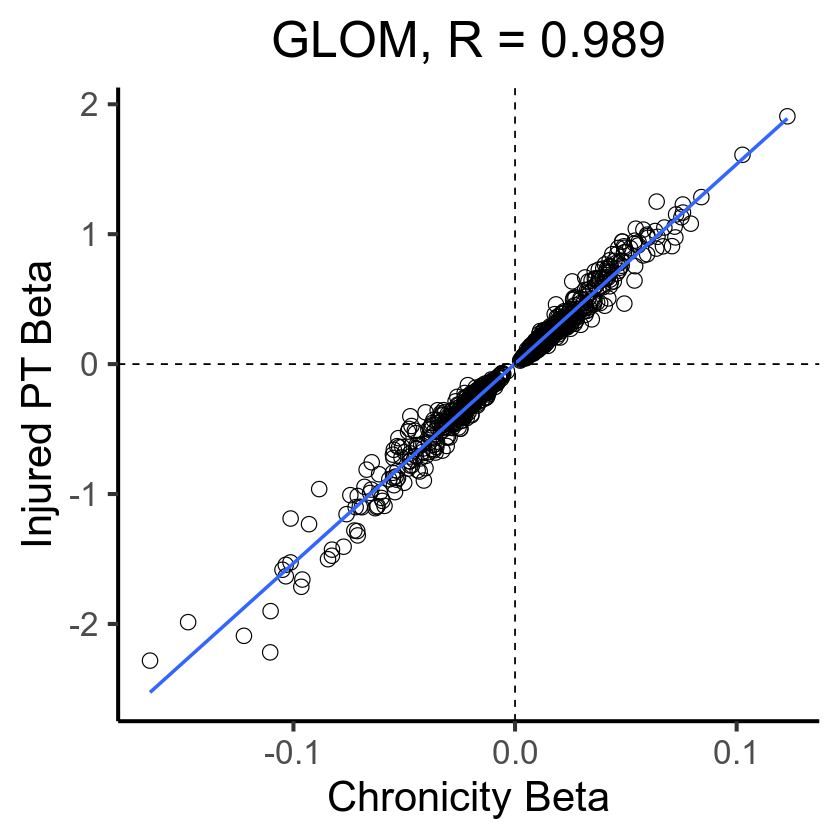

In [31]:
gene_plot <- ggplot(plot_df, aes(x = Chron_Beta, y = Injured_PT_Beta)) + 
                    geom_point(shape = 1, size = 4) + 
                    theme_classic(base_size = 25) + 
                    geom_smooth(method = "lm", se = FALSE) +
                    labs(x = "Chronicity Beta", 
                         y = "Injured PT Beta",
                         title = "GLOM, R = 0.989") +
                    geom_vline(xintercept = 0, linetype = "dashed") + 
                    geom_hline(yintercept = 0, linetype = "dashed") +
                    theme(text=element_text(family="Arial"),
                          plot.title=element_text(hjust=0.5))

cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/supplemental_figures/figure10/figure10h.png",
       gene_plot,
       base_height = 8,
       base_width = 8)
gene_plot